# Objectives 
- 고객의 대출 등급에 따른 분류
- EDA(탐색적데이터탐색) 이후 isnull().sum(), 단위제거 및 자료형 변환 
- pd.concat, Feature Engineering

train.csv [파일] 
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급 : 예측 목표


test.csv [파일]
고객 관련 금융 정보
ID : 대출 고객의 고유 ID
대출등급이 존재하지 않음


sample_submission.csv [파일] - 제출 양식
ID : 대출 고객의 고유 ID
대출등급 : test.csv에서 제공된 고객의 대출등급을 예측하여 기입


In [74]:
#pd.concat or submission.csv를 불러들여서 컬럼 하나 만들어서, .fillna(pred예측한걸 넣어라)

'''

1 submission.csv에 컬럼하나만들고,

2 = 예측값 pred

'''

'\n\n1 submission.csv에 컬럼하나만들고,\n\n2 = 예측값 pred\n\n'

## Import Functions

In [75]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [76]:

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


# Pre-Processing X_train

In [77]:
# 학습용 데이터 불러오기

train_path = 'D:\Code\[중]고객 대출 등급 문류 해커톤/train.csv'

df_train = pd.read_csv(train_path)

print(f'학습용 데이터 : \n{df_train}')

df_train.isnull().sum()

# 누락 데이터 없음

학습용 데이터 : 
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [79]:
# 정답, 레이블 컬럼 : 대출등급
label = df_train.loc[:,'대출등급']

cleaned_df=df_train.drop(columns=['대출등급'])

print('*'*80)

print(label)

print('*'*80)

print(cleaned_df)

print('*'*80)



********************************************************************************
0        C
1        B
2        A
3        C
4        B
        ..
96289    C
96290    E
96291    A
96292    D
96293    C
Name: 대출등급, Length: 96294, dtype: object
********************************************************************************
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  13200

In [80]:
label.value_counts()

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

In [81]:
print(df_train)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

## Outlier 이상치 확인 및 제거

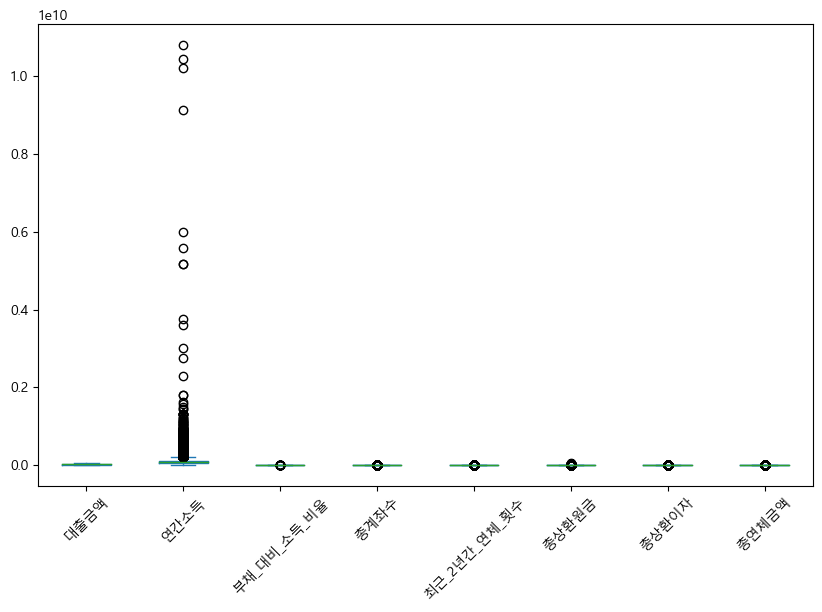

********************************************************************************


In [82]:
cleaned_df.loc[:, ['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자','총연체금액']].plot(kind='box', rot=45)
plt.show()

print('*'*80)

#cleaned_df.loc[:,['주택소유상태','ID','대출기간','근로기간','대출목적',].plot(kind='box', rot=45) # no numeric


# 대출금액의 이상치는 존재 x



In [83]:
# 연간소득컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = cleaned_df.loc[:,'연간소득'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'연간소득'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'연간소득']<min) | (cleaned_df.loc[:,'연간소득']>max)

print('*'*80)

outlier = cleaned_df.loc[:,'연간소득'][condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[:,'연간소득'][condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year = cleaned_df.loc[:,'연간소득'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year}')

print('*'*80)




1사분위값 : 
57600000.0
********************************************************************************
3사분위값 : 
112800000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 55200000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -25200000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 195600000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
34       222000000
50       198000000
78       259200000
114      420000000
132      384000000
           ...    
96263    210000000
96268    231000000
96273    222000000
96286    244800000
96289    210000000
Name: 연간소득, Length: 4347, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         71

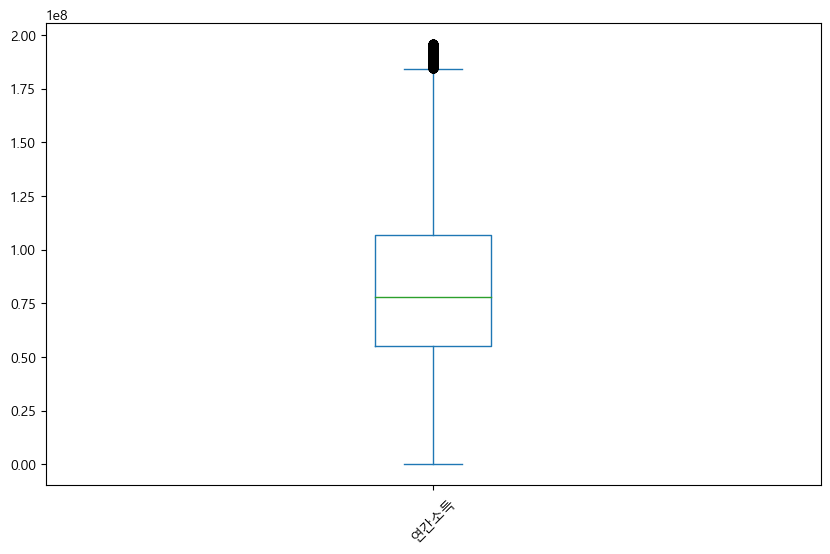

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
106800000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 51600000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -22200000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 184200000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
134      184800000
312      186000000
323      186000000
550      184800000
617      186000000
           ...    
95755    192000000
95804    192000000
96004    186000000
96076    192000000
96223    186000000
Name: 연간소득, Length: 856, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         717

In [84]:
### 연간 소득 컬럼의 두번째 이상치 판단

# 연간소득컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year.quantile(q=0.25)

q3 = cleaned_year.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year<min) | (cleaned_year>max)

print('*'*80)

outlier = cleaned_year.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year2 = cleaned_year.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year2}')

print('*'*80)




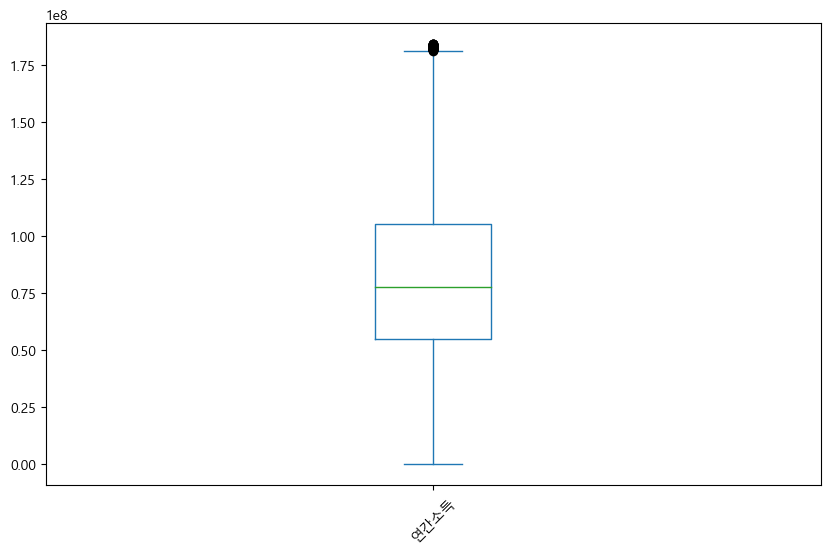

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105600000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 50400000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -20400000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 181200000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
637      182880000
743      182400000
893      182400000
950      183600000
3096     183960000
           ...    
94194    183600000
94878    182400000
95239    183600000
95695    182940000
95857    184178400
Name: 연간소득, Length: 106, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         717

In [85]:
### 연간 소득 컬럼의 세번째 이상치 판단

# 연간소득컬럼의 세번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year2.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year2.quantile(q=0.25)

q3 = cleaned_year2.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year2<min) | (cleaned_year2>max)

print('*'*80)

outlier = cleaned_year2.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year2.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year3 = cleaned_year2.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year3}')

print('*'*80)




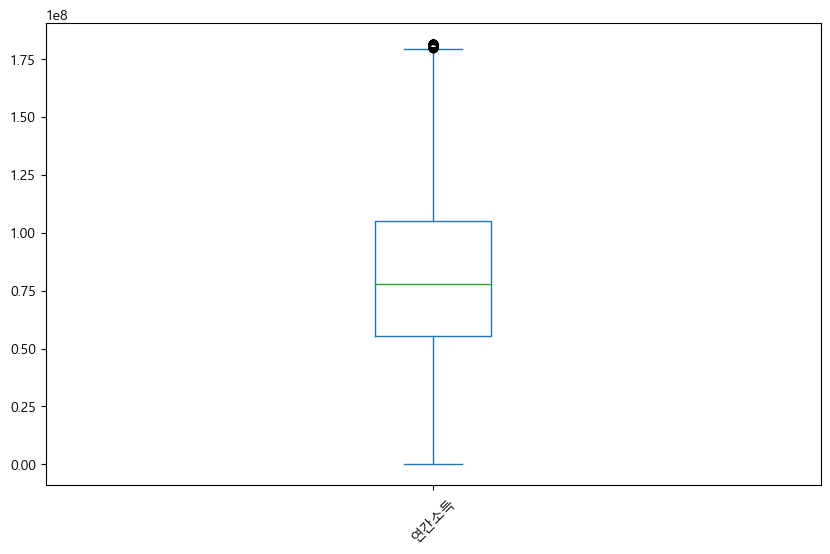

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105000000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 49800000.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -19500000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 179700000.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
77       180000000
153      180000000
158      180000000
246      180000000
252      180000000
           ...    
95627    180000000
95739    180000000
95789    180000000
95875    180000000
96249    180000000
Name: 연간소득, Length: 1147, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         71

In [86]:
### 연간 소득 컬럼의 네 번째 이상치 판단 

# 연간소득컬럼의 네번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year3.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year3.quantile(q=0.25)

q3 = cleaned_year3.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year3<min) | (cleaned_year3>max)

print('*'*80)

outlier = cleaned_year3.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year3.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year4 = cleaned_year3.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year4}')

print('*'*80)




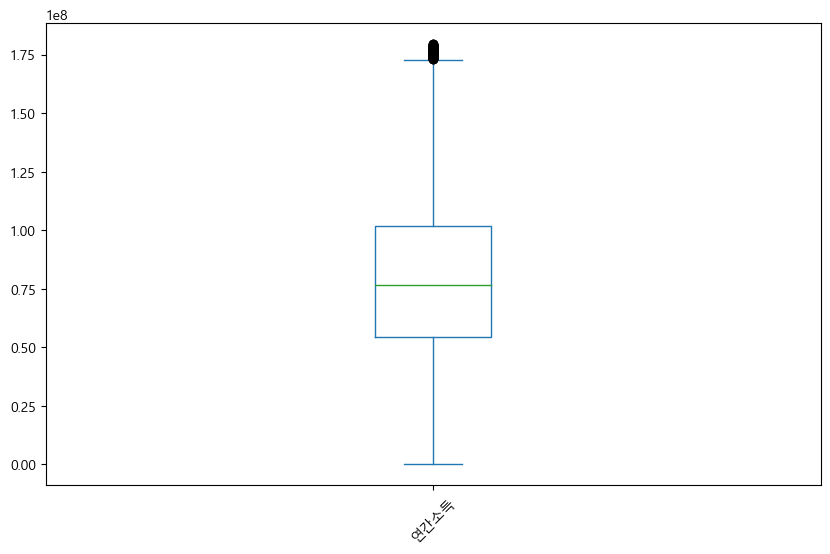

1사분위값 : 
54568800.0
********************************************************************************
3사분위값 : 
102000000.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 47431200.0
********************************************************************************
연간 소득 컬럼의 첫번째 정상범위의 최솟값 : -16578000.0
연간 소득 컬럼의 첫번째 정상범위의 최댓값 : 173146800.0
********************************************************************************
********************************************************************************
연간 소득 컬럼의 첫번째 이상치 : 
62       174000000
72       177600000
271      178800000
445      174000000
456      174000000
           ...    
95858    174000000
95907    176400000
96026    174000000
96161    174000000
96261    174000000
Name: 연간소득, Length: 462, dtype: int64
********************************************************************************
최종 결과 : 
0         72000000
1        130800000
2         96000000
3        132000000
4         717

In [87]:
### 연간 소득 컬럼의 다섯번째 이상치 판단 

# 연간소득컬럼의 다섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year4.plot(kind='box', rot=45)
plt.show()

# 이상치 존재..

q1 = cleaned_year4.quantile(q=0.25)

q3 = cleaned_year4.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year4<min) | (cleaned_year4>max)

print('*'*80)

outlier = cleaned_year4.loc[condition]

print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_year4.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year5 = cleaned_year4.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year5}')

print('*'*80)




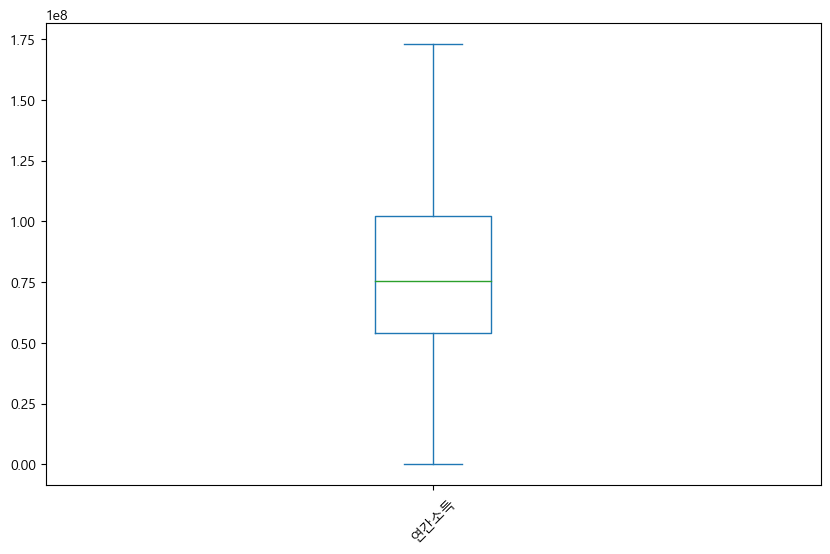

In [88]:
### 연간 소득 컬럼의 여섯번째 이상치 판단 

# 연간소득컬럼의 여섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year5.plot(kind='box', rot=45)
plt.show()

# 이제서야 이상치가 제거됨..

## 
#
#q1 = cleaned_year4.quantile(q=0.25)
#
#q3 = cleaned_year4.quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'연간 소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'연간 소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_year4<min) | (cleaned_year4>max)
#
#print('*'*80)
#
#outlier = cleaned_year4.loc[condition]
#
#print(f'연간 소득 컬럼의 첫번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_year4.loc[condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_year5 = cleaned_year4.drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_year5}')
#
#print('*'*80)
#
#


In [89]:
cleaned_df.columns


Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

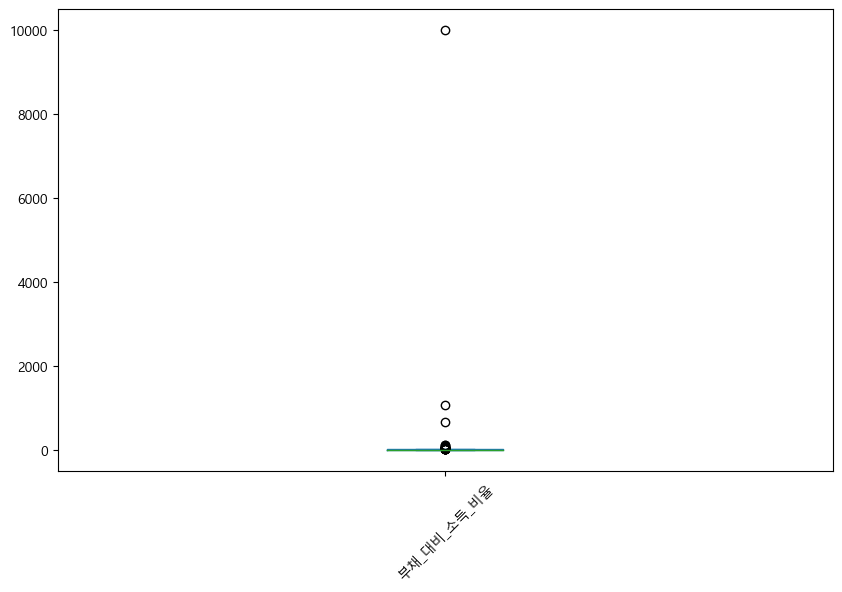

 1사분위값 : 
12.65
********************************************************************************
 3사분위값 : 
25.54
********************************************************************************
부채 대비 소득 비율컬럼의 첫번째 iqr = 12.889999999999999
********************************************************************************
부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최솟값 : -6.684999999999997
부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최댓값 : 6.205000000000002
********************************************************************************
********************************************************************************
부채 대비 소득 비율 컬럼의 첫번째 이상치 : 
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAI

In [90]:
# 부채 대비 소득 비율 컬럼의 이상치 확인

cleaned_df.loc[:,'부채_대비_소득_비율'].plot(kind='box', rot=45)
plt.show()

# 이상치 존재 

'''
1. IQR = Q3- Q1
2. 젇상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.75)

iqr = q3 - q1

print(f' 1사분위값 : \n{q1}')
print('*'*80)
print(f' 3사분위값 : \n{q3}')
print('*'*80)

print(f'부채 대비 소득 비율컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상범위의 최솟값

min = q1 - ( iqr * 1.5 ) 
print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상범위의 최댓값
max = q3 - ( iqr * 1.5 ) 
print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'부채_대비_소득_비율']<min) | (cleaned_df.loc[:,'부채_대비_소득_비율']>max)

print('*'*80)

outlier = cleaned_df.loc[condition]

print(f'부채 대비 소득 비율 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = cleaned_df.loc[condition].index
print(f' 부채 대비 소득 비율 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_ratio = cleaned_df.loc[:,'부채_대비_소득_비율'].drop(index=outlier_index)
print(f'최종 경과 : \n{cleaned_ratio}')

print('*'*80)

# 이상치 존재.

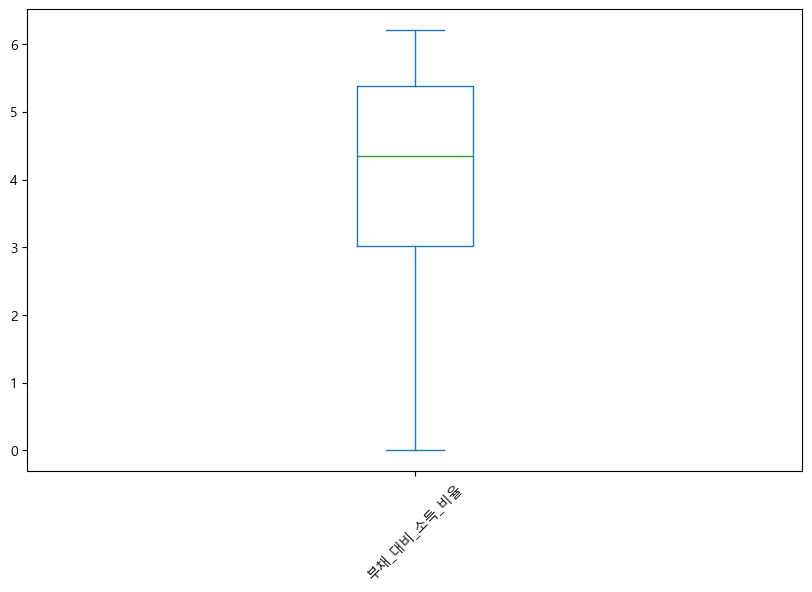

In [91]:
# 부채 대비 소득 비율 컬럼의 두번째 이상치 확인

cleaned_ratio.plot(kind='box', rot=45)
plt.show()



## 이상치 존재하지 않음. 여기서 끝. 
#
#'''
#1. IQR = Q3- Q1
#2. 젇상 범위의 취소 : Q1 - (IQR*1.5)
#3. 정상 범위의 최대 : Q3 + (IQR*1.5)
#'''
#
#q1 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.25)
#
#q3 = cleaned_df.loc[:,'부채_대비_소득_비율'].quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f' 1사분위값 : \n{q1}')
#print('*'*80)
#print(f' 3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'부채 대비 소득 비율컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상범위의 최솟값
#
#min = q1 - ( iqr * 1.5 ) 
#print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상범위의 최댓값
#max = q3 - ( iqr * 1.5 ) 
#print(f'부채 대비 소득 비율 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_df.loc[:,'부채_대비_소득_비율']<min) | (cleaned_df.loc[:,'부채_대비_소득_비율']>max)
#
#print('*'*80)
#
#outlier = cleaned_df.loc[condition]
#
#print(f'부채 대비 소득 비율 컬럼의 첫번째 이상치 : \n{outlier}')
#
#print('*'*80)
#
#outlier_index = cleaned_df.loc[condition].index
#print(f' 부채 대비 소득 비율 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거.
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_ratio = cleaned_df.loc[:,'부채_대비_소득_비율'].drop(index=outlier_index)
#print(f'최종 경과 : \n{cleaned_ratio}')
#
#print('*'*80)
#
## 이상치 존재.

In [92]:
cleaned_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

In [93]:
# 총 계좌 수 컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = cleaned_df.loc[:,'총계좌수'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'총계좌수'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총계좌수 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총계좌수 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'총계좌수']<min) | (cleaned_df.loc[:,'총계좌수']>max)

print('*'*80)

outlier = cleaned_df.loc[condition]

print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_counts = cleaned_df.loc[:,'총계좌수'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_counts}')

print('*'*80)




1사분위값 : 
17.0
********************************************************************************
3사분위값 : 
32.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 15.0
********************************************************************************
총계좌수 컬럼의 첫번째 정상범위의 최솟값 : -5.5
총계좌수 컬럼의 첫번째 정상범위의 최댓값 : 54.5
********************************************************************************
********************************************************************************
총계좌수 컬럼의 첫번째 이상치 : 
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
27     TRAIN_00027  12960000   36 months  10+ years  MORTGAGE  117600000   
59     TRAIN_00059  16200000   36 months    5 years  MORTGAGE   78000000   
64     TRAIN_00064  30000000   60 months  10+ years  MORTGAGE  120769200   
102    TRAIN_00102  26400000   60 months  10+ years  MORTGAGE   73560000   
134    TRAIN_00134  15000000   36 months  10+ years  MORTGAGE  184800000   
...   

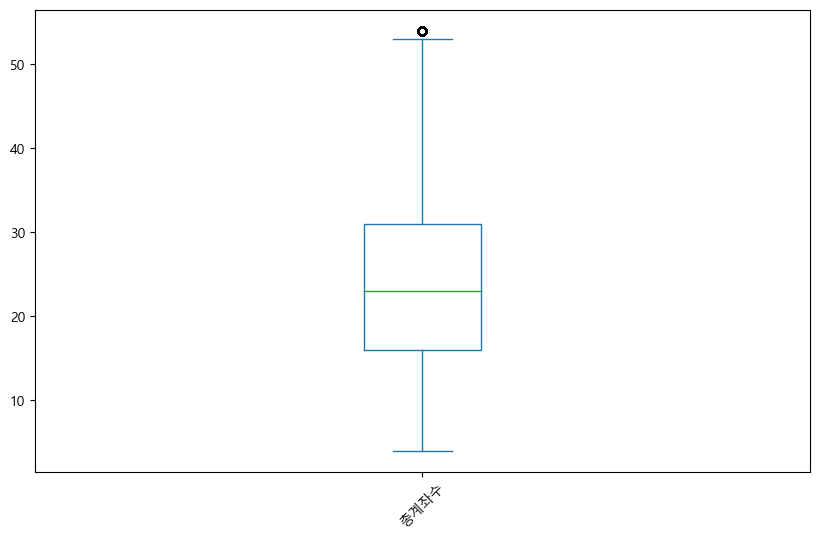

1사분위값 : 
16.0
********************************************************************************
3사분위값 : 
31.0
********************************************************************************
연간 소득 컬럼의 첫번째 iqr = 15.0
********************************************************************************
총계좌수 컬럼의 첫번째 정상범위의 최솟값 : -6.5
총계좌수 컬럼의 첫번째 정상범위의 최댓값 : 53.5
********************************************************************************
********************************************************************************
총계좌수 컬럼의 첫번째 이상치 : 
365      54
669      54
1265     54
1968     54
2017     54
         ..
94518    54
95008    54
95236    54
95796    54
95982    54
Name: 총계좌수, Length: 282, dtype: int64
********************************************************************************
최종 결과 : 
0        15
1        21
2        14
3        15
4        19
         ..
96289    33
96290    25
96291    22
96292    21
96293    14
Name: 총계좌수, Length: 93915, dtype: int64
******************************

In [94]:
# 총 계좌 수 컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_counts.plot(kind='box', rot=45)
plt.show()

# 이상치가 존재

q1 = cleaned_counts.quantile(q=0.25)

q3 = cleaned_counts.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총계좌수 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총계좌수 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_counts<min) | (cleaned_counts>max)

print('*'*80)

outlier = cleaned_counts[condition]

print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_counts[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_counts2 = cleaned_counts.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_counts2}')

print('*'*80)




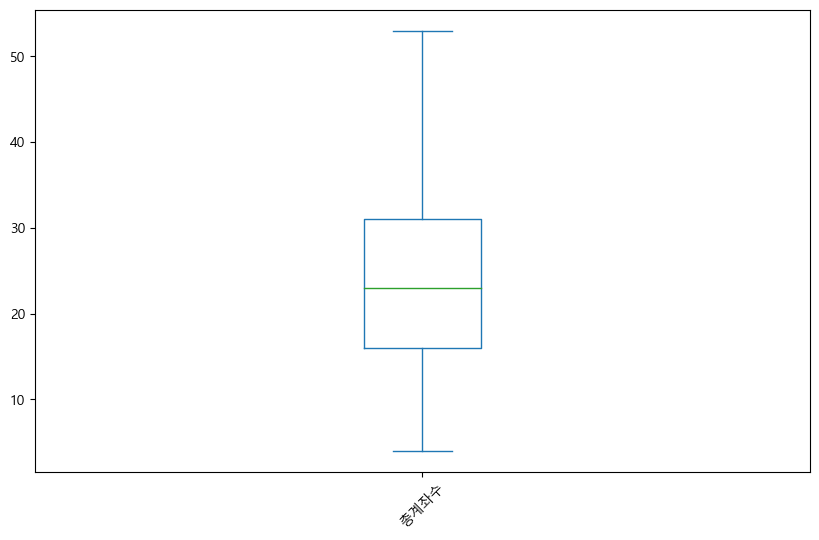

In [95]:
# 총 계좌 수 컬럼의 세번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_counts2.plot(kind='box', rot=45)
plt.show()

# 이상치가 존재X, 이대로 이상치 제거 완료.

#q1 = cleaned_counts.quantile(q=0.25)
#
#q3 = cleaned_counts.quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'연간 소득 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'총계좌수 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'총계좌수 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_counts<min) | (cleaned_counts>max)
#
#print('*'*80)
#
#outlier = cleaned_counts[condition]
#
#print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_counts[condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_counts2 = cleaned_counts.drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_counts2}')
#
#print('*'*80)
#
#


In [96]:
cleaned_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

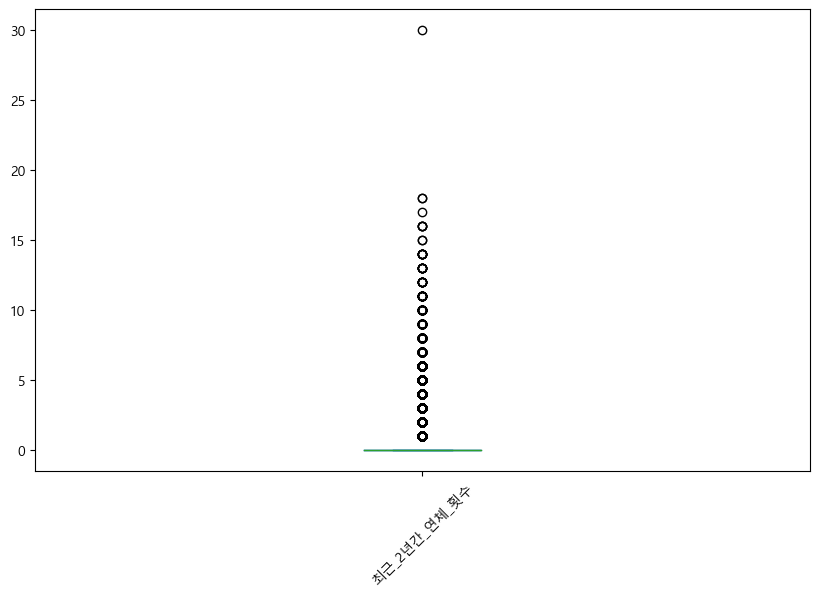

1사분위값 : 
0.0
********************************************************************************
3사분위값 : 
0.0
********************************************************************************
최근 2년간 연체 횟수 컬럼의 첫번째 iqr = 0.0
********************************************************************************
최근 2년간 연체 횟수 컬럼의 첫번째 정상범위의 최솟값 : 0.0
최근 2년간 연체 횟수 컬럼의 첫번째 정상범위의 최댓값 : 0.0
********************************************************************************
********************************************************************************
총계좌수 컬럼의 첫번째 이상치 : 
11        1
13        1
27        9
29        1
31       11
         ..
96266     2
96270     1
96277     1
96288    10
96292     2
Name: 최근_2년간_연체_횟수, Length: 19902, dtype: int64
********************************************************************************
최종 결과 : 
0        0
1        0
2        0
3        0
4        0
        ..
96287    0
96289    0
96290    0
96291    0
96293    0
Name: 최근_2년간_연체_횟수, Length: 76392, dtype: int64
*****

In [97]:
# 최근 2년간 연체 횟수 컬럼의 첫 번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_df.loc[:, '최근_2년간_연체_횟수'].plot(kind='box', rot=45)
plt.show()

#이상치가 존재

q1 = cleaned_df.loc[:, '최근_2년간_연체_횟수'].quantile(q=0.25)

q3 = cleaned_df.loc[:, '최근_2년간_연체_횟수'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'최근 2년간 연체 횟수 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'최근 2년간 연체 횟수 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'최근 2년간 연체 횟수 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:, '최근_2년간_연체_횟수']<min) | (cleaned_df.loc[:, '최근_2년간_연체_횟수']>max)

print('*'*80)

outlier = cleaned_df.loc[:, '최근_2년간_연체_횟수'][condition]

print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[:, '최근_2년간_연체_횟수'][condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_sec = cleaned_df.loc[:, '최근_2년간_연체_횟수'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_sec}')

print('*'*80)




c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


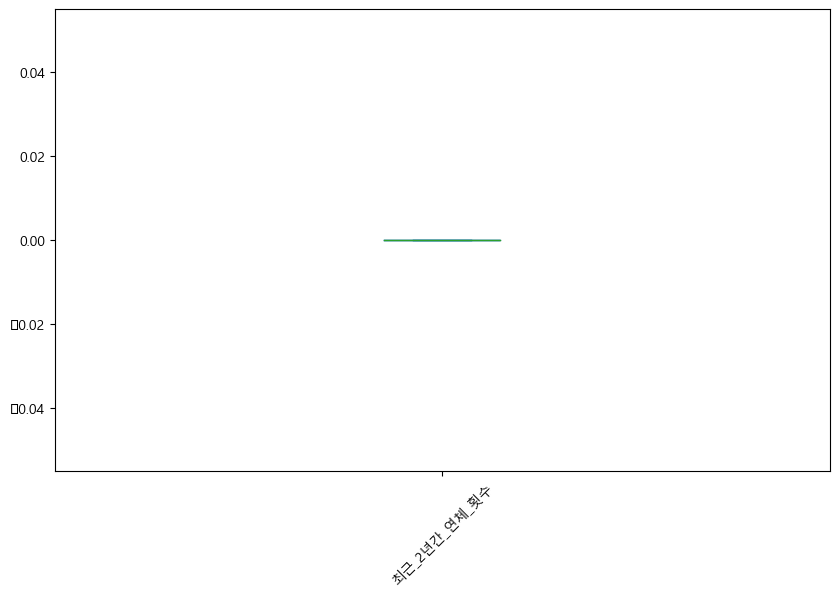

In [98]:
# 최근 2년간 연체 횟수 컬럼의 두 번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_sec.plot(kind='box', rot=45)
plt.show()

#이상치가 존재x

##이상치가 존재
#
#q1 = cleaned_df.loc[:, '최근_2년간_연체_횟수'].quantile(q=0.25)
#
#q3 = cleaned_df.loc[:, '최근_2년간_연체_횟수'].quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'최근 2년간 연체 횟수 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'최근 2년간 연체 횟수 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'최근 2년간 연체 횟수 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_df.loc[:, '최근_2년간_연체_횟수']<min) | (cleaned_df.loc[:, '최근_2년간_연체_횟수']>max)
#
#print('*'*80)
#
#outlier = cleaned_df.loc[:, '최근_2년간_연체_횟수'][condition]
#
#print(f'총계좌수 컬럼의 첫번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_df.loc[:, '최근_2년간_연체_횟수'][condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_sec = cleaned_df.loc[:, '최근_2년간_연체_횟수'].drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_sec}')
#
#print('*'*80)
#
#


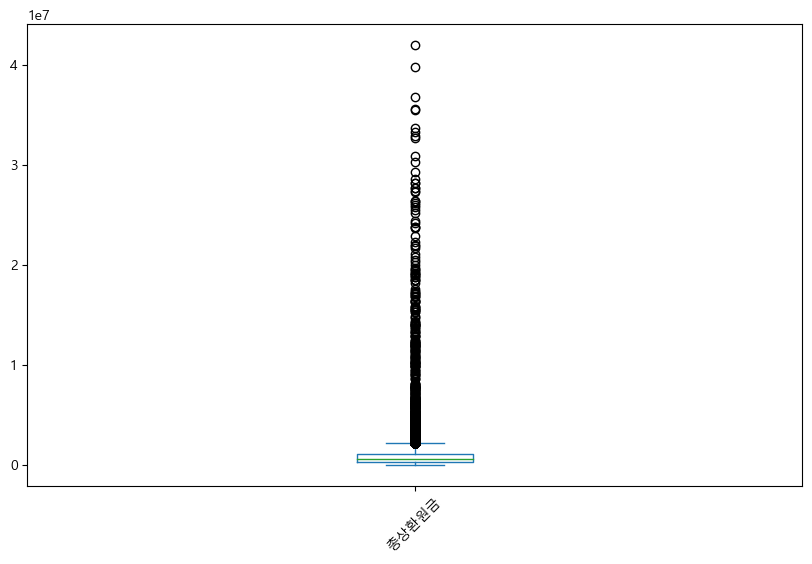

1사분위값 : 
307572.0
********************************************************************************
3사분위값 : 
1055076.0
********************************************************************************
총상환원금 컬럼의 첫번째 iqr = 747504.0
********************************************************************************
총상환원금컬럼의 첫번째 정상범위의 최솟값 : -813684.0
총상환원금컬럼의 첫번째 정상범위의 최댓값 : 2176332.0
********************************************************************************
********************************************************************************
총상환원금 컬럼의 첫번째 이상치 : 
133       2224284
179      20527032
194       3849096
230       2270688
278       2710536
           ...   
96156     2625612
96174     2278200
96179     2258784
96249     4071996
96272     2728116
Name: 총상환원금, Length: 5196, dtype: int64
********************************************************************************
최종 결과 : 
0              0
1         373572
2         928644
3         325824
4         228540
          ...   
96289   

In [99]:
# 총상환원금 컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_df.loc[:,'총상환원금'].plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

#이상치가 존재

q1 = cleaned_df.loc[:,'총상환원금'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'총상환원금'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환원금 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환원금컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환원금컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'총상환원금']<min) | (cleaned_df.loc[:,'총상환원금']>max)

print('*'*80)

outlier = cleaned_df.loc[:,'총상환원금'][condition]

print(f'총상환원금 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[:,'총상환원금'][condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_debt = cleaned_df.loc[:,'총상환원금'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_debt}')

print('*'*80)




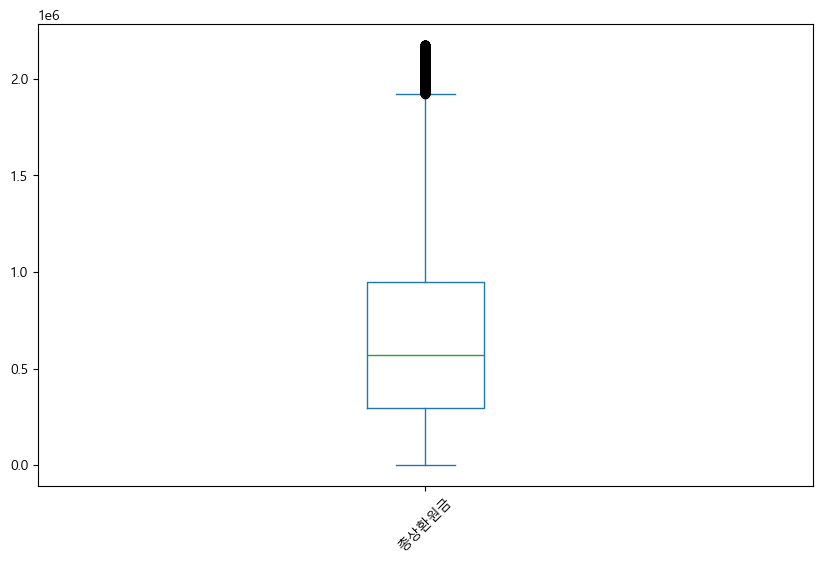

1사분위값 : 
294948.0
********************************************************************************
3사분위값 : 
946383.0
********************************************************************************
총상환원금 컬럼의 두번째 iqr = 651435.0
********************************************************************************
총상환원금컬럼의 두번째 정상범위의 최솟값 : -682204.5
총상환원금컬럼의 두번째 정상범위의 최댓값 : 1923535.5
********************************************************************************
********************************************************************************
총상환원금 컬럼의 두번째 이상치 : 
62       2072736
88       2027736
167      2101812
215      2168424
270      1979532
          ...   
96128    1950168
96201    1950372
96269    1960620
96270    1982676
96278    2132196
Name: 총상환원금, Length: 1767, dtype: int64
********************************************************************************
최종 결과 : 
0              0
1         373572
2         928644
3         325824
4         228540
          ...   
96289     974580
962

In [100]:
# 총상환원금 컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_debt.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

#이상치가 존재

q1 = cleaned_debt.quantile(q=0.25)

q3 = cleaned_debt.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환원금 컬럼의 두번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환원금컬럼의 두번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환원금컬럼의 두번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_debt<min) | (cleaned_debt>max)

print('*'*80)

outlier =  cleaned_debt[condition]

print(f'총상환원금 컬럼의 두번째 이상치 : \n{outlier}')

outlier_index =  cleaned_debt[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_debt2 =  cleaned_debt.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_debt2}')

print('*'*80)




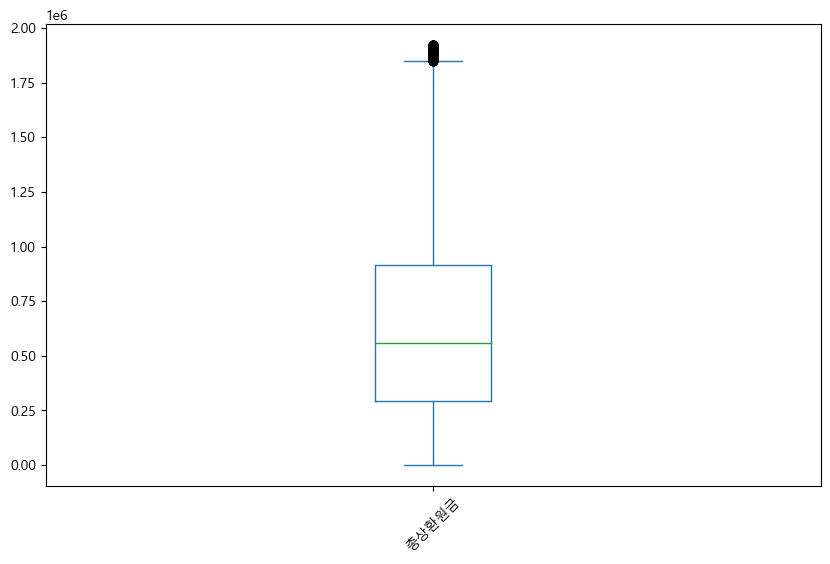

1사분위값 : 
290844.0
********************************************************************************
3사분위값 : 
914418.0
********************************************************************************
총상환원금 컬럼의 세번째 iqr = 623574.0
********************************************************************************
총상환원금컬럼의 세번째 정상범위의 최솟값 : -644517.0
총상환원금컬럼의 세번째 정상범위의 최댓값 : 1849779.0
********************************************************************************
********************************************************************************
총상환원금 컬럼의 세번째 이상치 : 
45       1908936
178      1895088
463      1902420
717      1910016
726      1856340
          ...   
95156    1921176
95197    1872684
95709    1880436
96161    1902036
96286    1902036
Name: 총상환원금, Length: 666, dtype: int64
********************************************************************************
최종 결과 : 
0              0
1         373572
2         928644
3         325824
4         228540
          ...   
96289     974580
9629

In [101]:
# 총상환원금 컬럼의 세번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_debt2.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

#이상치가 존재

q1 = cleaned_debt2.quantile(q=0.25)

q3 = cleaned_debt2.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환원금 컬럼의 세번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환원금컬럼의 세번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환원금컬럼의 세번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_debt2<min) | (cleaned_debt2>max)

print('*'*80)

outlier = cleaned_debt2[condition]

print(f'총상환원금 컬럼의 세번째 이상치 : \n{outlier}')

outlier_index = cleaned_debt2[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_debt3 = cleaned_debt2.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_debt3}')

print('*'*80)




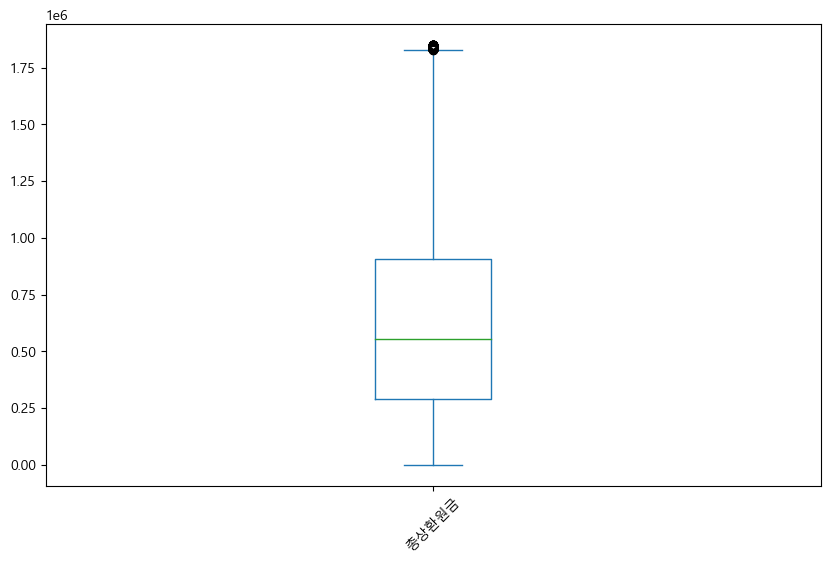

1사분위값 : 
289872.0
********************************************************************************
3사분위값 : 
905472.0
********************************************************************************
총상환원금 컬럼의 네번째 iqr = 615600.0
********************************************************************************
총상환원금컬럼의 네번째 정상범위의 최솟값 : -633528.0
총상환원금컬럼의 네번째 정상범위의 최댓값 : 1828872.0
********************************************************************************
********************************************************************************
총상환원금 컬럼의 네번째 이상치 : 
840      1833336
1472     1835664
1518     1840920
1579     1839312
1905     1838136
          ...   
94790    1846056
94853    1829748
95581    1830108
95677    1833324
95804    1833336
Name: 총상환원금, Length: 247, dtype: int64
********************************************************************************
최종 결과 : 
0              0
1         373572
2         928644
3         325824
4         228540
          ...   
96289     974580
9629

In [102]:
# 총상환원금 컬럼의 네번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_debt3.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

#이상치가 존재

q1 = cleaned_debt3.quantile(q=0.25)

q3 = cleaned_debt3.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환원금 컬럼의 네번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환원금컬럼의 네번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환원금컬럼의 네번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_debt3<min) | (cleaned_debt3>max)

print('*'*80)

outlier = cleaned_debt3[condition]

print(f'총상환원금 컬럼의 네번째 이상치 : \n{outlier}')

outlier_index = cleaned_debt3[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_debt4 = cleaned_debt3.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_debt4}')

print('*'*80)




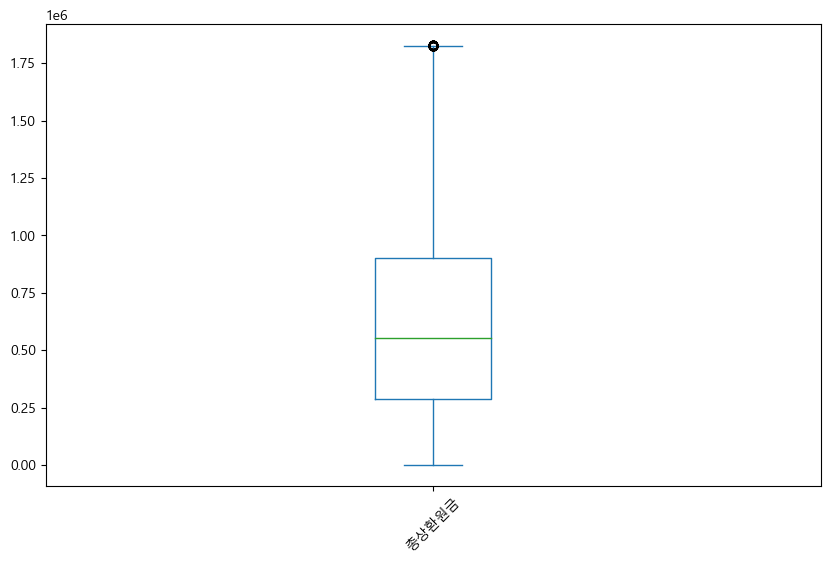

1사분위값 : 
289203.0
********************************************************************************
3사분위값 : 
902736.0
********************************************************************************
총상환원금 컬럼의 다섯번째 iqr = 613533.0
********************************************************************************
총상환원금컬럼의 다섯번째 정상범위의 최솟값 : -631096.5
총상환원금컬럼의 다섯번째 정상범위의 최댓값 : 1823035.5
********************************************************************************
********************************************************************************
총상환원금 컬럼의 다섯번째 이상치 : 
387      1824804
1549     1827924
3497     1828572
4862     1824804
6207     1827288
10910    1828572
12592    1825512
12741    1823208
14245    1826724
15170    1824804
15739    1825260
16418    1825380
18826    1824804
21297    1824804
22796    1824804
26559    1828572
26756    1827288
29576    1824804
34776    1826724
36458    1824048
36606    1824804
39405    1824804
41690    1824804
42287    1824804
47418    1825488
55836    1

In [103]:
# 총상환원금 컬럼의 다섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_debt4.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

#이상치가 존재

q1 = cleaned_debt4.quantile(q=0.25)

q3 = cleaned_debt4.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환원금 컬럼의 다섯번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환원금컬럼의 다섯번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환원금컬럼의 다섯번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_debt4<min) | (cleaned_debt4>max)

print('*'*80)

outlier = cleaned_debt4[condition]

print(f'총상환원금 컬럼의 다섯번째 이상치 : \n{outlier}')

outlier_index = cleaned_debt4[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_debt5 = cleaned_debt4.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_debt5}')

print('*'*80)




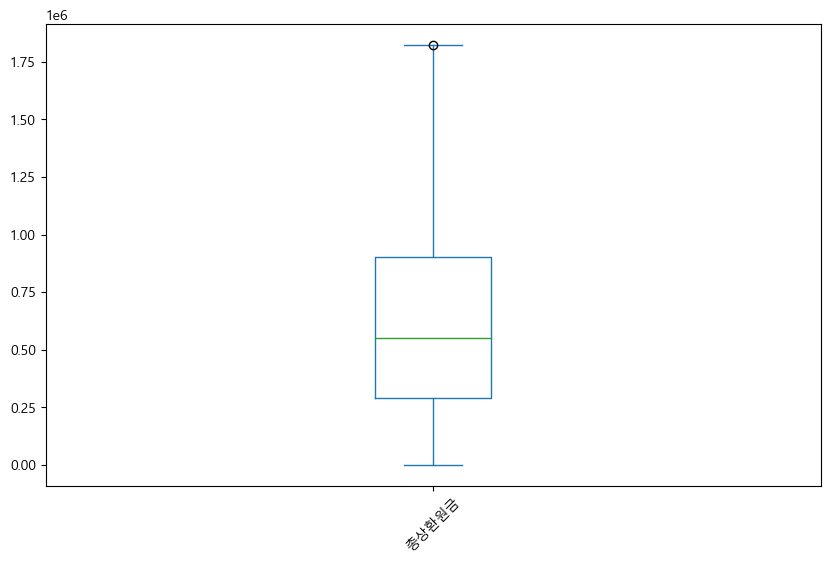

1사분위값 : 
288984.0
********************************************************************************
3사분위값 : 
902556.0
********************************************************************************
총상환원금 컬럼의 여섯번째 iqr = 613572.0
********************************************************************************
총상환원금컬럼의 여섯번째 정상범위의 최솟값 : -631374.0
총상환원금컬럼의 여섯번째 정상범위의 최댓값 : 1822914.0
********************************************************************************
********************************************************************************
총상환원금 컬럼의 여섯번째 이상치 : 
7268    1822956
Name: 총상환원금, dtype: int64
********************************************************************************
최종 결과 : 
0              0
1         373572
2         928644
3         325824
4         228540
          ...   
96289     974580
96290     583728
96291    1489128
96292    1378368
96293     596148
Name: 총상환원금, Length: 88376, dtype: int64
***************************************************************************

In [104]:
# 총상환원금 컬럼의 여섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_debt5.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

#이상치가 존재

q1 = cleaned_debt5.quantile(q=0.25)

q3 = cleaned_debt5.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환원금 컬럼의 여섯번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환원금컬럼의 여섯번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환원금컬럼의 여섯번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_debt5<min) | (cleaned_debt5>max)

print('*'*80)

outlier = cleaned_debt5[condition]

print(f'총상환원금 컬럼의 여섯번째 이상치 : \n{outlier}')

outlier_index = cleaned_debt5[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_debt6 = cleaned_debt5.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_debt6}')

print('*'*80)




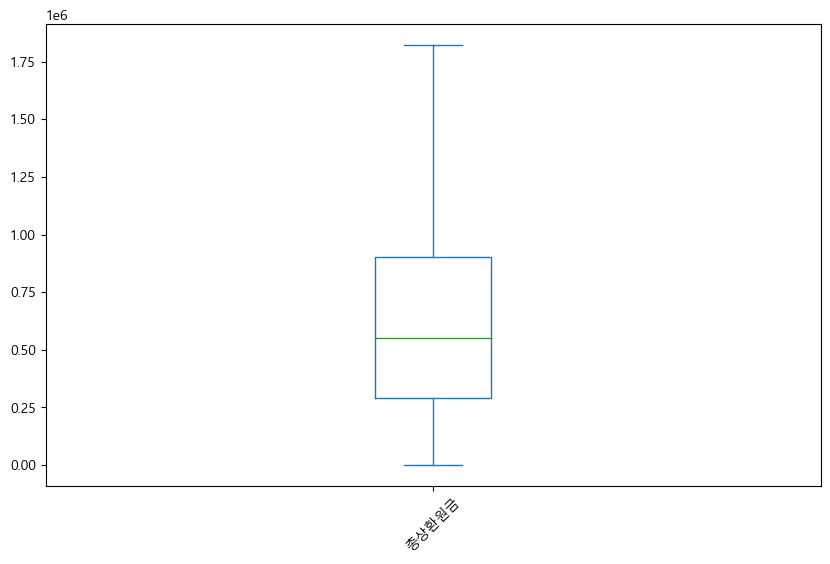

In [105]:
# 총상환원금 컬럼의 일곱번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_debt6.plot(kind='box', rot=45)
plt.show()

#이상치가 존재x

##이상치가 존재
#
#q1 = cleaned_debt5.quantile(q=0.25)
#
#q3 = cleaned_debt5.quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'총상환원금 컬럼의 여섯번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'총상환원금컬럼의 여섯번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'총상환원금컬럼의 여섯번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_debt5<min) | (cleaned_debt5>max)
#
#print('*'*80)
#
#outlier = cleaned_debt5[condition]
#
#print(f'총상환원금 컬럼의 여섯번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_debt5[condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_debt6 = cleaned_debt5.drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_debt6}')
#
#print('*'*80)
#



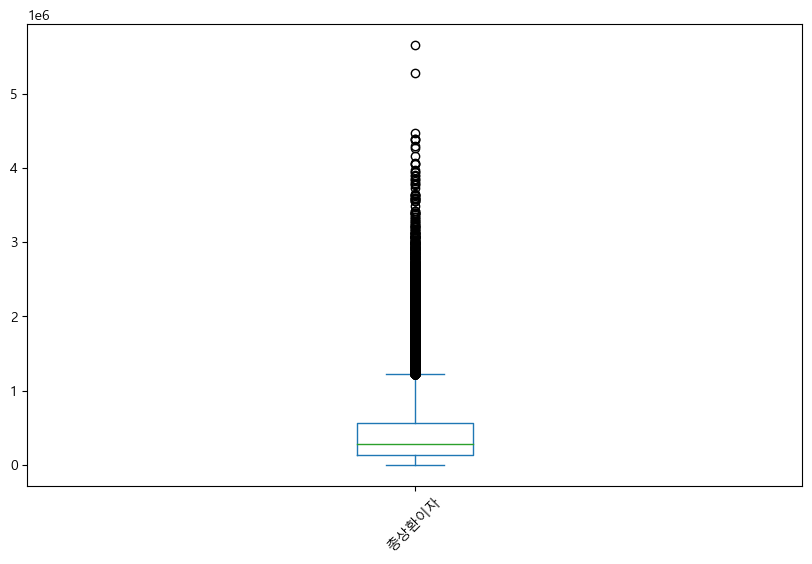

1사분위값 : 
134616.0
********************************************************************************
3사분위값 : 
570216.0
********************************************************************************
총상환이자 컬럼의 첫번째 iqr = 435600.0
********************************************************************************
총상환이자컬럼의 첫번째 정상범위의 최솟값 : -518784.0
총상환이자컬럼의 첫번째 정상범위의 최댓값 : 1223616.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 첫번째 이상치 : 
10       1523172.0
16       2377524.0
24       1292412.0
28       1582344.0
62       1660344.0
           ...    
96260    1828968.0
96261    1582812.0
96262    1307868.0
96278    1302840.0
96286    2075832.0
Name: 총상환이자, Length: 5878, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
        

In [106]:
# 총상환이자 컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_df.loc[:,'총상환이자'].plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_df.loc[:,'총상환이자'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'총상환이자'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'총상환이자']<min) | (cleaned_df.loc[:,'총상환이자']>max)

print('*'*80)

outlier = cleaned_df.loc[:,'총상환이자'][condition]

print(f'총상환이자 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[:,'총상환이자'][condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int = cleaned_df.loc[:,'총상환이자'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int}')

print('*'*80)




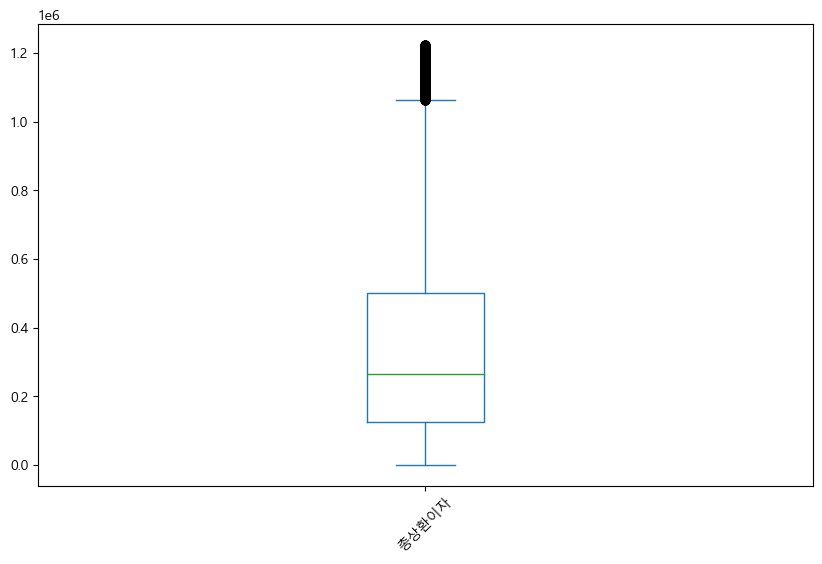

1사분위값 : 
126324.0
********************************************************************************
3사분위값 : 
501015.0
********************************************************************************
총상환이자 컬럼의 두번째 iqr = 374691.0
********************************************************************************
총상환이자컬럼의 두번째 정상범위의 최솟값 : -435712.5
총상환이자컬럼의 두번째 정상범위의 최댓값 : 1063051.5
********************************************************************************
********************************************************************************
총상환이자 컬럼의 두번째 이상치 : 
29       1113456.0
49       1123932.0
106      1092012.0
126      1154256.0
133      1087404.0
           ...    
96139    1152216.0
96153    1103556.0
96156    1155492.0
96218    1087848.0
96226    1133880.0
Name: 총상환이자, Length: 2327, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
        

In [107]:
# 총상환이자 컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int.quantile(q=0.25)

q3 = cleaned_int.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 두번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 두번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 두번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int<min) | (cleaned_int>max)

print('*'*80)

outlier = cleaned_int[condition]

print(f'총상환이자 컬럼의 두번째 이상치 : \n{outlier}')

outlier_index = cleaned_int[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int2 = cleaned_int.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int2}')

print('*'*80)




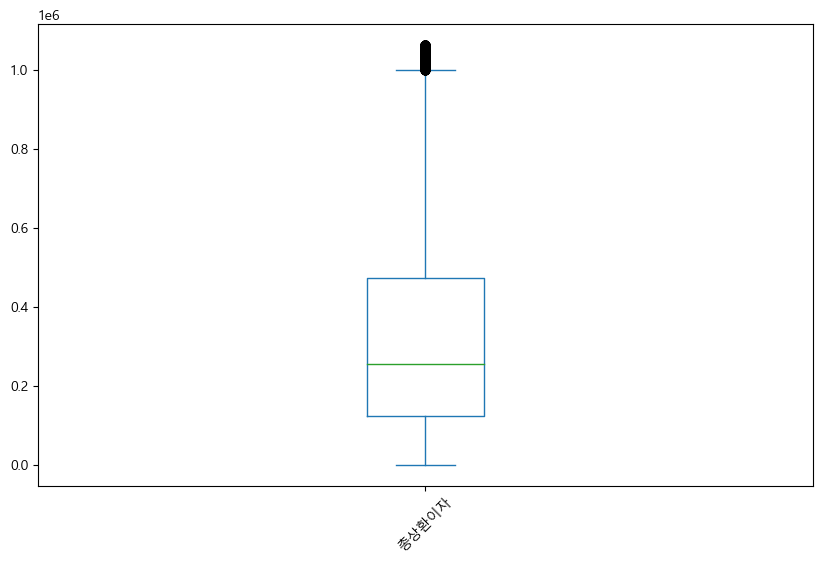

1사분위값 : 
123084.0
********************************************************************************
3사분위값 : 
473964.0
********************************************************************************
총상환이자 컬럼의 세번째 iqr = 350880.0
********************************************************************************
총상환이자컬럼의 세번째 정상범위의 최솟값 : -403236.0
총상환이자컬럼의 세번째 정상범위의 최댓값 : 1000284.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 세번째 이상치 : 
211      1057968.0
344      1008444.0
373      1029588.0
416      1029252.0
486      1041588.0
           ...    
95968    1023504.0
96018    1018104.0
96083    1013376.0
96085    1029480.0
96163    1050216.0
Name: 총상환이자, Length: 1255, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
        

In [108]:
# 총상환이자 컬럼의 세번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int2.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int2.quantile(q=0.25)

q3 = cleaned_int2.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 세번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 세번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 세번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int2<min) | (cleaned_int2>max)

print('*'*80)

outlier = cleaned_int2[condition]

print(f'총상환이자 컬럼의 세번째 이상치 : \n{outlier}')

outlier_index = cleaned_int2[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int3 = cleaned_int2.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int3}')

print('*'*80)




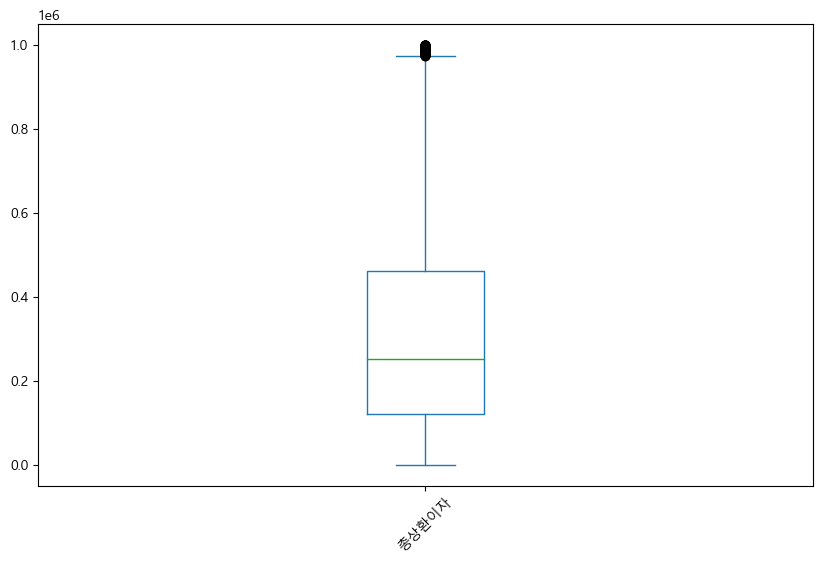

1사분위값 : 
121656.0
********************************************************************************
3사분위값 : 
462984.0
********************************************************************************
총상환이자 컬럼의 네번째 iqr = 341328.0
********************************************************************************
총상환이자컬럼의 네번째 정상범위의 최솟값 : -390336.0
총상환이자컬럼의 네번째 정상범위의 최댓값 : 974976.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 네번째 이상치 : 
94       996204.0
179      977484.0
600      998580.0
627      995616.0
800      977148.0
           ...   
95427    992472.0
95525    996204.0
95885    993300.0
96045    990396.0
96080    985464.0
Name: 총상환이자, Length: 515, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
           ...   
962

In [109]:
# 총상환이자 컬럼의 네번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int3.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int3.quantile(q=0.25)

q3 = cleaned_int3.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 네번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 네번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 네번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int3<min) | (cleaned_int3>max)

print('*'*80)

outlier = cleaned_int3[condition]

print(f'총상환이자 컬럼의 네번째 이상치 : \n{outlier}')

outlier_index = cleaned_int3[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int4 = cleaned_int3.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int4}')

print('*'*80)




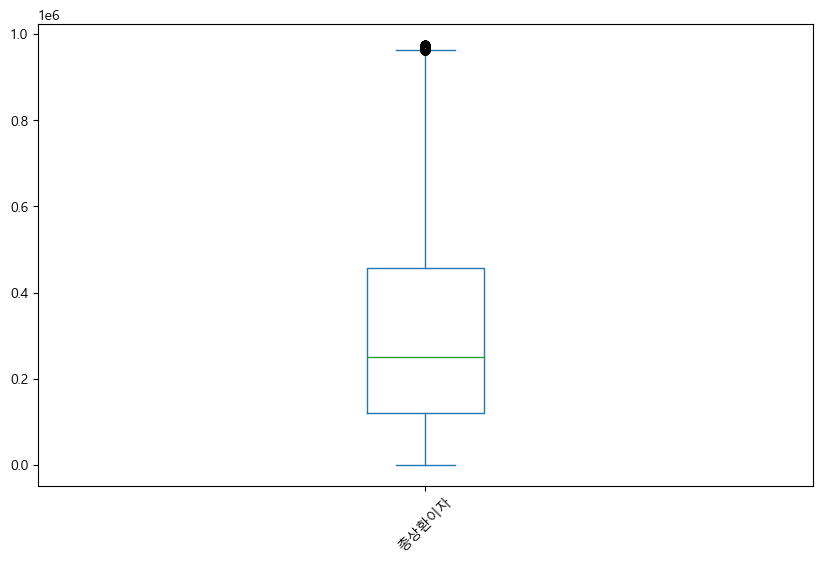

1사분위값 : 
121092.0
********************************************************************************
3사분위값 : 
457800.0
********************************************************************************
총상환이자 컬럼의 다섯번째 iqr = 336708.0
********************************************************************************
총상환이자컬럼의 다섯번째 정상범위의 최솟값 : -383970.0
총상환이자컬럼의 다섯번째 정상범위의 최댓값 : 962862.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 다섯번째 이상치 : 
520      971124.0
626      963432.0
2031     972504.0
2353     972360.0
2969     966816.0
           ...   
95073    965688.0
95137    963264.0
95356    970620.0
95537    968916.0
95875    967140.0
Name: 총상환이자, Length: 268, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
           ...   

In [110]:
# 총상환이자 컬럼의 다섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int4.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int4.quantile(q=0.25)

q3 = cleaned_int4.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 다섯번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 다섯번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 다섯번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int4<min) | (cleaned_int4>max)

print('*'*80)

outlier = cleaned_int4[condition]

print(f'총상환이자 컬럼의 다섯번째 이상치 : \n{outlier}')

outlier_index = cleaned_int4[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int5 = cleaned_int4.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int5}')

print('*'*80)




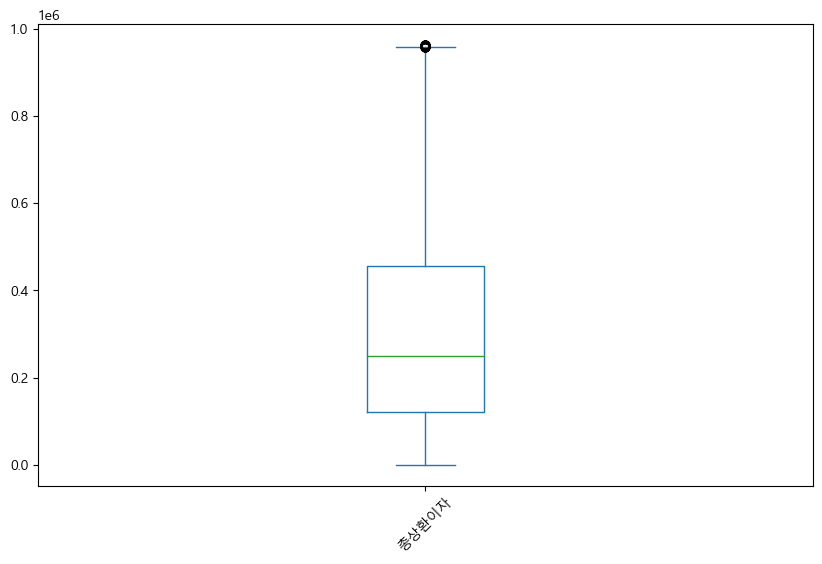

1사분위값 : 
120522.0
********************************************************************************
3사분위값 : 
455352.0
********************************************************************************
총상환이자 컬럼의 여섯번째 iqr = 334830.0
********************************************************************************
총상환이자컬럼의 여섯번째 정상범위의 최솟값 : -381723.0
총상환이자컬럼의 여섯번째 정상범위의 최댓값 : 957597.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 여섯번째 이상치 : 
353      962856.0
1656     959808.0
1890     961824.0
1991     961272.0
2252     959652.0
           ...   
94340    957744.0
94484    961272.0
94601    960144.0
95170    961272.0
95528    962676.0
Name: 총상환이자, Length: 129, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
           ...   

In [111]:
# 총상환이자 컬럼의 여섯번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int5.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int5.quantile(q=0.25)

q3 = cleaned_int5.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 여섯번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 여섯번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 여섯번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int5<min) | (cleaned_int5>max)

print('*'*80)

outlier = cleaned_int5[condition]

print(f'총상환이자 컬럼의 여섯번째 이상치 : \n{outlier}')

outlier_index = cleaned_int5[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int6 = cleaned_int5.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int6}')

print('*'*80)




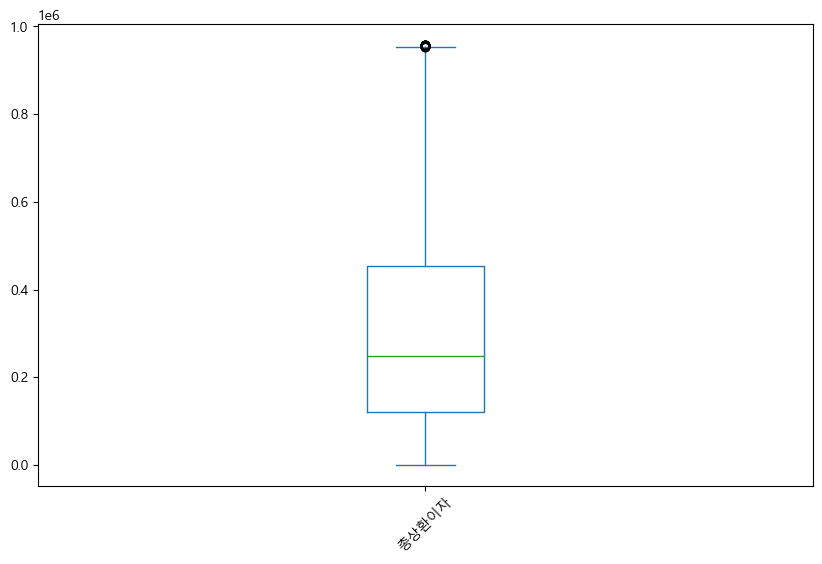

1사분위값 : 
120447.0
********************************************************************************
3사분위값 : 
453756.0
********************************************************************************
총상환이자 컬럼의 일곱번째 iqr = 333309.0
********************************************************************************
총상환이자컬럼의 일곱번째 정상범위의 최솟값 : -379516.5
총상환이자컬럼의 일곱번째 정상범위의 최댓값 : 953719.5
********************************************************************************
********************************************************************************
총상환이자 컬럼의 일곱번째 이상치 : 
270      956208.0
524      956028.0
2548     955176.0
3878     955320.0
5294     956988.0
           ...   
90317    955332.0
93934    954720.0
95123    954528.0
95313    954528.0
95451    954636.0
Name: 총상환이자, Length: 65, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
           ...   


In [112]:
# 총상환이자 컬럼의 일곱번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int6.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int6.quantile(q=0.25)

q3 = cleaned_int6.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 일곱번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 일곱번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 일곱번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int6<min) | (cleaned_int6>max)

print('*'*80)

outlier = cleaned_int6[condition]

print(f'총상환이자 컬럼의 일곱번째 이상치 : \n{outlier}')

outlier_index = cleaned_int6[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int7 = cleaned_int6.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int7}')

print('*'*80)




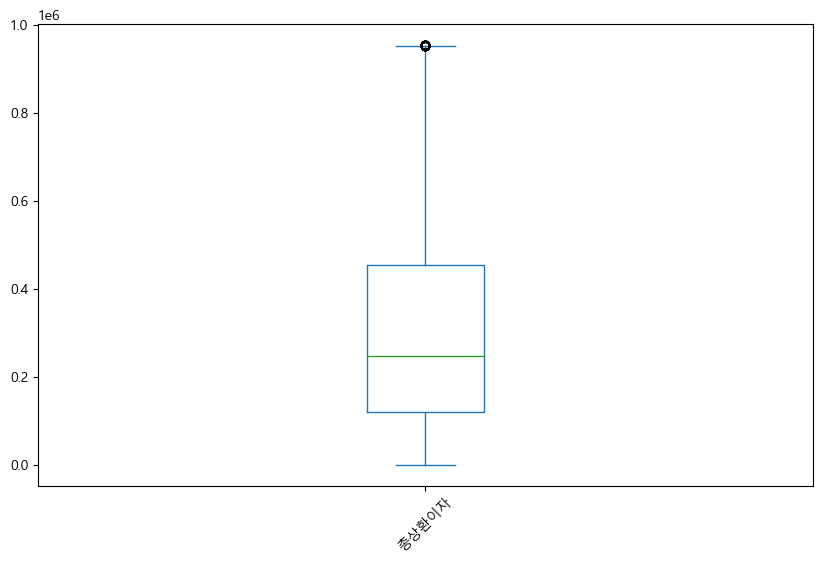

1사분위값 : 
120336.0
********************************************************************************
3사분위값 : 
453000.0
********************************************************************************
총상환이자 컬럼의 여덟번째 iqr = 332664.0
********************************************************************************
총상환이자컬럼의 여덟번째 정상범위의 최솟값 : -378660.0
총상환이자컬럼의 여덟번째 정상범위의 최댓값 : 951996.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 여덟번째 이상치 : 
2732     953316.0
11245    953208.0
14495    953184.0
15959    953112.0
19425    952248.0
23906    953376.0
27200    953376.0
30529    952224.0
35860    953376.0
36153    952176.0
42607    953376.0
43863    953376.0
45341    953376.0
48760    952260.0
54637    952944.0
56605    952464.0
58480    953424.0
64967    952140.0
66846    952608.0
70815    952248.0
71066    952992.0
71202    953532.0
76286    953016.0
88144    953304.0
8823

In [113]:
# 총상환이자 컬럼의 여덟번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int7.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int7.quantile(q=0.25)

q3 = cleaned_int7.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 여덟번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 여덟번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 여덟번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int7<min) | (cleaned_int7>max)

print('*'*80)

outlier = cleaned_int7[condition]

print(f'총상환이자 컬럼의 여덟번째 이상치 : \n{outlier}')

outlier_index = cleaned_int7[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int8 = cleaned_int7.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int8}')

print('*'*80)




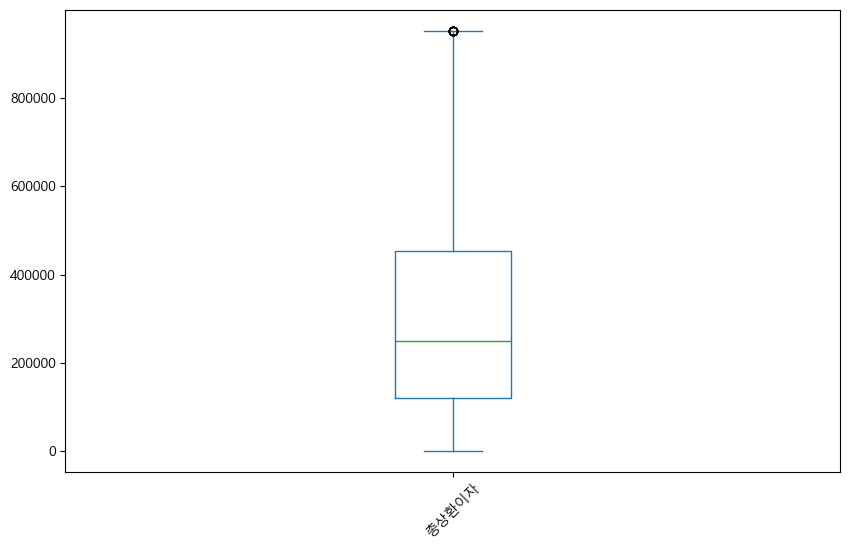

1사분위값 : 
120312.0
********************************************************************************
3사분위값 : 
452868.0
********************************************************************************
총상환이자 컬럼의 아홉번째 iqr = 332556.0
********************************************************************************
총상환이자컬럼의 아홉번째 정상범위의 최솟값 : -378522.0
총상환이자컬럼의 아홉번째 정상범위의 최댓값 : 951702.0
********************************************************************************
********************************************************************************
총상환이자 컬럼의 아홉번째 이상치 : 
7319     951912.0
16745    951984.0
19552    951828.0
25676    951960.0
38658    951840.0
53703    951720.0
62731    951768.0
65247    951828.0
Name: 총상환이자, dtype: float64
********************************************************************************
최종 결과 : 
0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
           ...   
96289    492168.0
96290    855084.0
96291    241236.0
96292    818

In [114]:
# 총상환이자 컬럼의 여덟번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int8.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_int8.quantile(q=0.25)

q3 = cleaned_int8.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총상환이자 컬럼의 아홉번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총상환이자컬럼의 아홉번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총상환이자컬럼의 아홉번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_int8<min) | (cleaned_int8>max)

print('*'*80)

outlier = cleaned_int8[condition]

print(f'총상환이자 컬럼의 아홉번째 이상치 : \n{outlier}')

outlier_index = cleaned_int8[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_int9 = cleaned_int8.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_int9}')

print('*'*80)




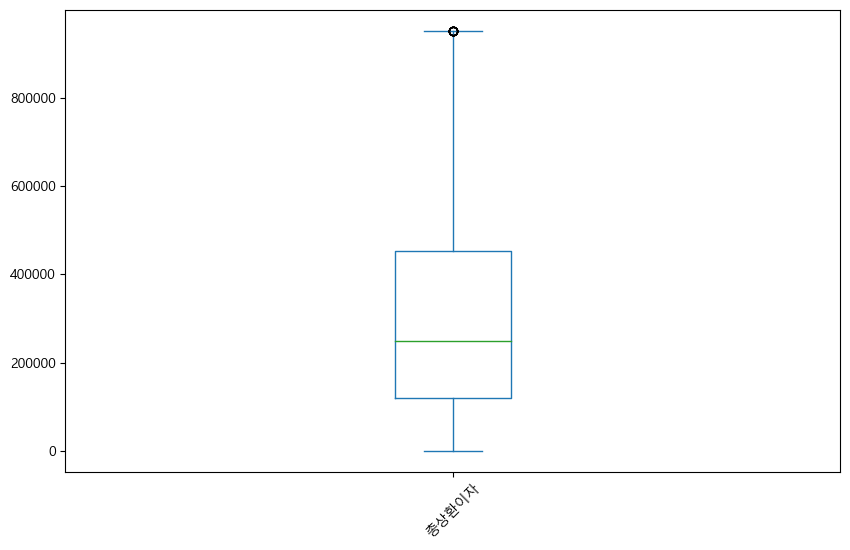

In [115]:
# 총상환이자 컬럼의 여덟번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_int9.plot(kind='box', rot=45)
plt.show()

# 

#이상치가 존재o 하지만 손실데이터가 너무 많아질 수도 있기 때문에, 여기까지...

#q1 = cleaned_int8.quantile(q=0.25)
#
#q3 = cleaned_int8.quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#print('*'*80)
#print(f'3사분위값 : \n{q3}')
#print('*'*80)
#
#print(f'총상환이자 컬럼의 아홉번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#min = q1 - ( iqr * 1.5)
#print(f'총상환이자컬럼의 아홉번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#max = q3 + ( iqr * 1.5)
#print(f'총상환이자컬럼의 아홉번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_int8<min) | (cleaned_int8>max)
#
#print('*'*80)
#
#outlier = cleaned_int8[condition]
#
#print(f'총상환이자 컬럼의 아홉번째 이상치 : \n{outlier}')
#
#outlier_index = cleaned_int8[condition].index
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_int9 = cleaned_int8.drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_int9}')
#
#print('*'*80)
#



In [116]:
abc = cleaned_df.loc[:,'총상환이자'] > 800000
abcd = cleaned_df.loc[abc,:]
print(abcd)

abcd

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
10     TRAIN_00010  19980000   60 months     1 year      RENT   60000000   
12     TRAIN_00012  25200000   60 months    7 years  MORTGAGE   99960000   
16     TRAIN_00016  42000000   60 months  10+ years  MORTGAGE  134400000   
23     TRAIN_00023  18000000   60 months  10+ years       OWN   43200000   
24     TRAIN_00024  20670000   60 months    7 years      RENT   61200000   
...            ...       ...         ...        ...       ...        ...   
96278  TRAIN_96278  19290000   36 months   10+years  MORTGAGE   72000000   
96280  TRAIN_96280  42000000   60 months  10+ years  MORTGAGE   85200000   
96286  TRAIN_96286  42000000   60 months    2 years  MORTGAGE  244800000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금      총상환이자  총연체금액  \
10         

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
10,TRAIN_00010,19980000,60 months,1 year,RENT,60000000,18.87,10,부채 통합,0,722244,1523172.0,0.0,0.0
12,TRAIN_00012,25200000,60 months,7 years,MORTGAGE,99960000,18.97,26,부채 통합,0,472416,873120.0,0.0,0.0
16,TRAIN_00016,42000000,60 months,10+ years,MORTGAGE,134400000,16.25,24,부채 통합,0,1792452,2377524.0,0.0,0.0
23,TRAIN_00023,18000000,60 months,10+ years,OWN,43200000,22.43,16,부채 통합,0,815148,905256.0,0.0,0.0
24,TRAIN_00024,20670000,60 months,7 years,RENT,61200000,20.33,36,기타,0,527244,1292412.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96278,TRAIN_96278,19290000,36 months,10+years,MORTGAGE,72000000,11.48,25,부채 통합,0,2132196,1302840.0,0.0,0.0
96280,TRAIN_96280,42000000,60 months,10+ years,MORTGAGE,85200000,30.53,23,신용 카드,0,1017708,817236.0,0.0,0.0
96286,TRAIN_96286,42000000,60 months,2 years,MORTGAGE,244800000,18.80,51,부채 통합,0,1902036,2075832.0,0.0,0.0
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0


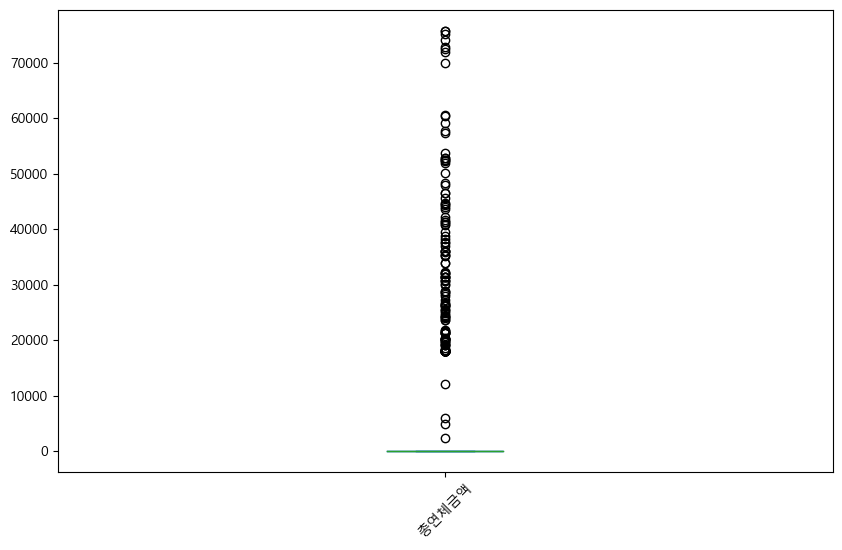

1사분위값 : 
0.0
********************************************************************************
3사분위값 : 
0.0
********************************************************************************
총연체금액 컬럼의 첫번째 iqr = 0.0
********************************************************************************
총연체금액컬럼의 첫번째 정상범위의 최솟값 : 0.0
총연체금액컬럼의 첫번째 정상범위의 최댓값 : 0.0
********************************************************************************
********************************************************************************
총연체금액 컬럼의 첫번째 이상치 : 
122      21792.0
671      18000.0
946      46536.0
1914     25284.0
1975     33996.0
          ...   
93704    30600.0
93752    32052.0
93775    18000.0
94549    38292.0
95501    18000.0
Name: 총연체금액, Length: 181, dtype: float64
********************************************************************************
최종 결과 : 
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96289    0.0
96290    0.0
96291    0.0
96292    0.0
96293    0.0
Name:

In [117]:
# 총연체금액 컬럼의 첫번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_df.loc[:,'총연체금액'].plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_df.loc[:,'총연체금액'].quantile(q=0.25)

q3 = cleaned_df.loc[:,'총연체금액'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총연체금액 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총연체금액컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총연체금액컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_df.loc[:,'총연체금액']<min) | (cleaned_df.loc[:,'총연체금액']>max)

print('*'*80)

outlier = cleaned_df.loc[:,'총연체금액'][condition]

print(f'총연체금액 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_df.loc[:,'총연체금액'][condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_rm = cleaned_df.loc[:,'총연체금액'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_rm}')

print('*'*80)




c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


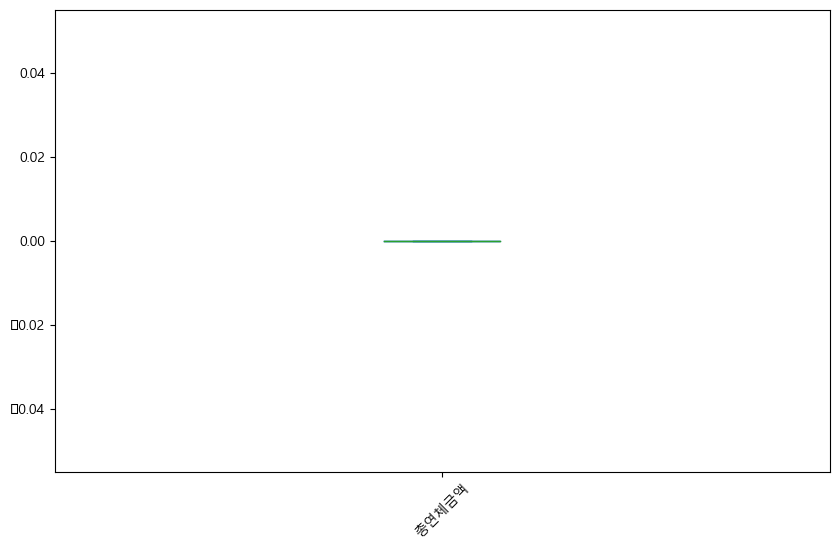

1사분위값 : 
0.0
********************************************************************************
3사분위값 : 
0.0
********************************************************************************
총연체금액 컬럼의 첫번째 iqr = 0.0
********************************************************************************
총연체금액컬럼의 첫번째 정상범위의 최솟값 : 0.0
총연체금액컬럼의 첫번째 정상범위의 최댓값 : 0.0
********************************************************************************
********************************************************************************
총연체금액 컬럼의 첫번째 이상치 : 
Series([], Name: 총연체금액, dtype: float64)
********************************************************************************
최종 결과 : 
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96289    0.0
96290    0.0
96291    0.0
96292    0.0
96293    0.0
Name: 총연체금액, Length: 96113, dtype: float64
********************************************************************************


In [118]:
# 총연체금액 컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_rm.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

q1 = cleaned_rm.quantile(q=0.25)

q3 = cleaned_rm.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')
print('*'*80)
print(f'3사분위값 : \n{q3}')
print('*'*80)

print(f'총연체금액 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값
min = q1 - ( iqr * 1.5)
print(f'총연체금액컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값
max = q3 + ( iqr * 1.5)
print(f'총연체금액컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_rm<min) | (cleaned_rm>max)

print('*'*80)

outlier = cleaned_rm[condition]

print(f'총연체금액 컬럼의 첫번째 이상치 : \n{outlier}')

outlier_index = cleaned_rm[condition].index

print('*'*80)

# 이후에 drop()으로 이상치 제거
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_rm2 = cleaned_rm.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_rm2}')
print('*'*80)

# 이상치 제거완료

c:\Users\human\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


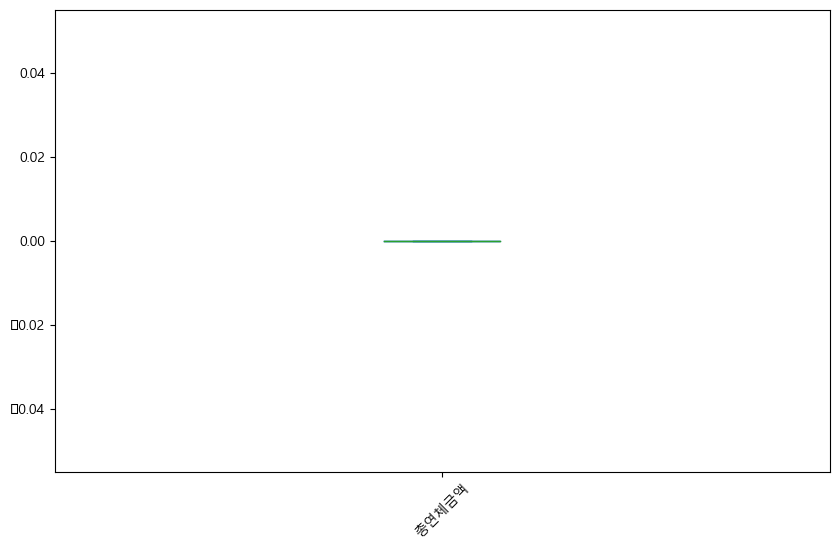

In [119]:
# 총연체금액 컬럼의 두번째 이상치 확인 및 제거

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_rm2.plot(kind='box', rot=45)
plt.show()

#이상치가 존재o 

# q1 = cleaned_rm.quantile(q=0.25)

# q3 = cleaned_rm.quantile(q=0.75)

# iqr = q3 - q1

# print(f'1사분위값 : \n{q1}')
# print('*'*80)
# print(f'3사분위값 : \n{q3}')
# print('*'*80)

# print(f'총연체금액 컬럼의 첫번째 iqr = {iqr}')

# print('*'*80)

# # 정상 범위의 최솟값
# min = q1 - ( iqr * 1.5)
# print(f'총연체금액컬럼의 첫번째 정상범위의 최솟값 : {min}')

# # 정상 범위의 최댓값
# max = q3 + ( iqr * 1.5)
# print(f'총연체금액컬럼의 첫번째 정상범위의 최댓값 : {max}')

# print('*'*80)

# condition = (cleaned_rm<min) | (cleaned_rm>max)

# print('*'*80)

# outlier = cleaned_rm[condition]

# print(f'총연체금액 컬럼의 첫번째 이상치 : \n{outlier}')

# outlier_index = cleaned_rm[condition].index

# print('*'*80)

# # 이후에 drop()으로 이상치 제거
# # df.col.drop(index=[이상치 행의 인덱스])
# cleaned_rm2 = cleaned_rm.drop(index=outlier_index)
# print(f'최종 결과 : \n{cleaned_rm2}')
# print('*'*80)

# # 이상치 제거완료

In [120]:
print(cleaned_df.columns)



Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')


In [121]:
# pd.concat

# cleaned_df.loc[:, ['ID', '대출금액', '대출기간', '근로기간', 
# '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '
# 최근_2년간_연체_횟수', '총상환원금', '총상환이자','총연체금액'


# cleaned_int9는 확인되지 않는 이상치가 존재하므로 제거.
data = [cleaned_df.loc[:,'ID'],
        cleaned_df.loc[:, '대출금액'],
        cleaned_df.loc[:, '대출기간'],
        cleaned_df.loc[:, '근로기간'],
        cleaned_year5,
        cleaned_ratio,
        cleaned_counts2,
        cleaned_df.loc[:,'대출목적'],
        cleaned_sec,
        cleaned_int9,
        cleaned_debt6,
        cleaned_rm2,
        df_train.loc[:,'대출등급']]

df_concat = pd.concat(data,
                      axis=1,
                      join='inner')

print(df_concat)

# reset_index() needed



                ID      대출금액        대출기간       근로기간       연간소득  부채_대비_소득_비율  \
43     TRAIN_00043   7200000   36 months    Unknown  100800000         1.69   
57     TRAIN_00057  24000000   60 months  10+ years  117600000         3.99   
75     TRAIN_00075  10800000   36 months     1 year   54000000         5.68   
108    TRAIN_00108   7200000   36 months    Unknown   54000000         2.59   
120    TRAIN_00120  10800000   36 months    3 years  159000000         1.81   
...            ...       ...         ...        ...        ...          ...   
96162  TRAIN_96162  14400000   36 months    Unknown   72000000         5.00   
96187  TRAIN_96187  14400000   36 months    3 years   52800000         2.32   
96210  TRAIN_96210  12000000   36 months    Unknown   64800000         5.75   
96252  TRAIN_96252   2580000   36 months    3 years   79200000         4.60   
96290  TRAIN_96290  28800000   60 months  10+ years  132000000         5.16   

       총계좌수   대출목적  최근_2년간_연체_횟수     총상환이자    총상환원금

In [122]:
df_concat = df_concat.reset_index()

print(df_concat)



      index           ID      대출금액        대출기간       근로기간       연간소득  \
0        43  TRAIN_00043   7200000   36 months    Unknown  100800000   
1        57  TRAIN_00057  24000000   60 months  10+ years  117600000   
2        75  TRAIN_00075  10800000   36 months     1 year   54000000   
3       108  TRAIN_00108   7200000   36 months    Unknown   54000000   
4       120  TRAIN_00120  10800000   36 months    3 years  159000000   
...     ...          ...       ...         ...        ...        ...   
3531  96162  TRAIN_96162  14400000   36 months    Unknown   72000000   
3532  96187  TRAIN_96187  14400000   36 months    3 years   52800000   
3533  96210  TRAIN_96210  12000000   36 months    Unknown   64800000   
3534  96252  TRAIN_96252   2580000   36 months    3 years   79200000   
3535  96290  TRAIN_96290  28800000   60 months  10+ years  132000000   

      부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수     총상환이자    총상환원금  총연체금액 대출등급  
0            1.69     7     기타             0   73812.0   

### Label Encoding

In [123]:

# 1 df_train.loc[:,'대출기간'] = df_train.loc[:,'대출기간'].apply(lambda x:x.split()[0])
# str.replace
# re.sub
pattern = '[^0-9]'
# df_concat.loc[:,'대출기간'] = df_concat.loc[:,'대출기간'].str.replace(pattern, '')

df_concat.loc[:,'대출기간'] = df_concat.loc[:,'대출기간'].apply(lambda x:re.sub(pattern, '', x))

# print(df_concat)

print(df_concat)

      index           ID      대출금액 대출기간       근로기간       연간소득  부채_대비_소득_비율  \
0        43  TRAIN_00043   7200000   36    Unknown  100800000         1.69   
1        57  TRAIN_00057  24000000   60  10+ years  117600000         3.99   
2        75  TRAIN_00075  10800000   36     1 year   54000000         5.68   
3       108  TRAIN_00108   7200000   36    Unknown   54000000         2.59   
4       120  TRAIN_00120  10800000   36    3 years  159000000         1.81   
...     ...          ...       ...  ...        ...        ...          ...   
3531  96162  TRAIN_96162  14400000   36    Unknown   72000000         5.00   
3532  96187  TRAIN_96187  14400000   36    3 years   52800000         2.32   
3533  96210  TRAIN_96210  12000000   36    Unknown   64800000         5.75   
3534  96252  TRAIN_96252   2580000   36    3 years   79200000         4.60   
3535  96290  TRAIN_96290  28800000   60  10+ years  132000000         5.16   

      총계좌수   대출목적  최근_2년간_연체_횟수     총상환이자    총상환원금  총연체금액 대출등급 

In [124]:
df_concat.drop(df_concat.columns[0], axis=1, inplace=True)

print(df_concat)

#여러 컬럼을 동시에 삭제할 때, axis 매개변수를 사용하여 행 또는 열을 삭제할 수 있습니다. 여기서 axis=1은 열을 삭제한다는 의미입니다.

# 그러나, 코드에서 사용한 df.drop(df.columns[0], axis=1)는 index가 없는 경우 level_0이라는 이름의 새로운 인덱스를 생성하는 것이 기본 동작입니다. 이를 방지하려면 inplace=True를 사용하여 원본 데이터프레임을 직접 수정하도록 설정하거나, 결과를 새로운 변수에 저장해야 합니다.

# 이렇게 하면 'level_0'이 생성되지 않고, 기존의 인덱스가 유지된다.

               ID      대출금액 대출기간       근로기간       연간소득  부채_대비_소득_비율  총계좌수  \
0     TRAIN_00043   7200000   36    Unknown  100800000         1.69     7   
1     TRAIN_00057  24000000   60  10+ years  117600000         3.99    16   
2     TRAIN_00075  10800000   36     1 year   54000000         5.68    12   
3     TRAIN_00108   7200000   36    Unknown   54000000         2.59     5   
4     TRAIN_00120  10800000   36    3 years  159000000         1.81     7   
...           ...       ...  ...        ...        ...          ...   ...   
3531  TRAIN_96162  14400000   36    Unknown   72000000         5.00    15   
3532  TRAIN_96187  14400000   36    3 years   52800000         2.32    26   
3533  TRAIN_96210  12000000   36    Unknown   64800000         5.75    13   
3534  TRAIN_96252   2580000   36    3 years   79200000         4.60    24   
3535  TRAIN_96290  28800000   60  10+ years  132000000         5.16    25   

       대출목적  최근_2년간_연체_횟수     총상환이자    총상환원금  총연체금액 대출등급  
0        기타     

In [125]:
### 근로기간 컬럼 
#
#kind3 = np.unique(df_concat.loc[:,'근로기간'])
#print(kind3)
#
#print('*'*80)
#
#df_concat.loc[:,'근로기간'] = df_concat.loc[:,'근로기간'].apply(lambda x : re.sub(pattern, '', x))
#print(df_concat)
#
#
## 길이가 0인 데이터가 됐으니
## 길이를 측정, Unknown 숫자에 대해선 len함수 쓸수x
#df_concat.loc[:,'근로기간'].values_counts()
#
## type str으로 바꾸고 len()로 길이를 재서 0인 놈은 drop
## if문으로 길이가 0일 때는 np none으로 누락처리하고
## dropna로 삭제.
#
## 문자열로 바꿔서 len()길이재서
## def work in x:
## x == 0,
##그 안에 apply()

In [126]:
kind4 = np.unique(df_concat.loc[:,'대출목적'].values)
print(kind4)

df_concat = df_concat.replace({'기타' : 0,
                   '부채 통합' : 1,
                   '소규모 사업' : 2,
                   '신용 카드' : 3,
                   '의료' : 4,
                   '이사' : 5,
                   '자동차' : 6,
                   '재생 에너지' : 7,
                   '주요 구매' : 8,
                   '주택' : 9,
                   '주택 개선' : 10,
                   '휴가' : 11
})

print(df_concat)

['기타' '부채 통합' '소규모 사업' '신용 카드' '의료' '이사' '자동차' '재생 에너지' '주요 구매' '주택'
 '주택 개선' '휴가']
               ID      대출금액 대출기간       근로기간       연간소득  부채_대비_소득_비율  총계좌수  \
0     TRAIN_00043   7200000   36    Unknown  100800000         1.69     7   
1     TRAIN_00057  24000000   60  10+ years  117600000         3.99    16   
2     TRAIN_00075  10800000   36     1 year   54000000         5.68    12   
3     TRAIN_00108   7200000   36    Unknown   54000000         2.59     5   
4     TRAIN_00120  10800000   36    3 years  159000000         1.81     7   
...           ...       ...  ...        ...        ...          ...   ...   
3531  TRAIN_96162  14400000   36    Unknown   72000000         5.00    15   
3532  TRAIN_96187  14400000   36    3 years   52800000         2.32    26   
3533  TRAIN_96210  12000000   36    Unknown   64800000         5.75    13   
3534  TRAIN_96252   2580000   36    3 years   79200000         4.60    24   
3535  TRAIN_96290  28800000   60  10+ years  132000000         5.16  

In [127]:
np.unique(df_concat.loc[:,'근로기간'].values)


array(['1 year', '1 years', '10+ years', '10+years', '2 years', '3',
       '3 years', '4 years', '5 years', '6 years', '7 years', '8 years',
       '9 years', '< 1 year', '<1 year', 'Unknown'], dtype=object)

In [128]:
### 근로기간의 Unknown 인덱스를 제거 후 apply.lambda(x)로 숫자 뒤에 문자열 변환, 그리고 object -> float로 변환

kind5 = np.unique(df_concat.loc[:,'근로기간'].values)
print(kind5)

df_concat = df_concat.replace({'1 year' : 1,
                               '1 years' : 1.5,
                               '2 years' : 2,
                               '3' : 3,
                               '3 years' : 3.5,
                               '4 years' : 4,
                               '5 years' : 5, 
                               '6 years' : 6.5,
                               '7 years' : 7.5,
                               '8 years' : 8.5,
                               '9 years' : 9.5,
                               '< 1 year' : 0.5,
                               '<1 year' : 0,
                               'Unknown' : 0.2,
                               '10+ years' : 10,
                               '10+years' : 10.5
})

print(df_concat)


#def remove(x):
#    if x == 'Unknown':
#        x = np.nan
#        return x
#    else:
#        return x
#
#df_concat.loc[:, '근로기간'] =  df_concat.loc[:, '근로기간'].apply(remove)
#
## Unknown - Nan값으로..
#
#
#
#df1 = df_concat.dropna() 
##or df_concat.dropna(inplace=True)
#
#print(df1)
#
#print('*'*80)
#
#df_concat.loc[:,'근로기간'].value_counts()

'''

def remove(x)는 내용물이 다 날라가기 때문에,
Label Encoding으로 유지해주는게 좋다.
One-hot Encoding을 쓸 수도 있으나
EDA를 먼저 해놓고 해야하는데 EDA 파트를 뒤로 미뤄놨기 때문에
Label Encoding으로 간다

'''

df_concat.loc[:,'근로기간'].value_counts()

['1 year' '1 years' '10+ years' '10+years' '2 years' '3' '3 years'
 '4 years' '5 years' '6 years' '7 years' '8 years' '9 years' '< 1 year'
 '<1 year' 'Unknown']
               ID      대출금액 대출기간  근로기간       연간소득  부채_대비_소득_비율  총계좌수  대출목적  \
0     TRAIN_00043   7200000   36   0.2  100800000         1.69     7     0   
1     TRAIN_00057  24000000   60  10.0  117600000         3.99    16     1   
2     TRAIN_00075  10800000   36   1.0   54000000         5.68    12     1   
3     TRAIN_00108   7200000   36   0.2   54000000         2.59     5     1   
4     TRAIN_00120  10800000   36   3.5  159000000         1.81     7     3   
...           ...       ...  ...   ...        ...          ...   ...   ...   
3531  TRAIN_96162  14400000   36   0.2   72000000         5.00    15     3   
3532  TRAIN_96187  14400000   36   3.5   52800000         2.32    26     1   
3533  TRAIN_96210  12000000   36   0.2   64800000         5.75    13     1   
3534  TRAIN_96252   2580000   36   3.5   79200000         4

근로기간
10.0    995
2.0     347
0.5     333
3.5     284
0.2     282
1.0     261
4.0     237
5.0     216
8.5     156
6.5     135
7.5     130
9.5     118
0.0      19
10.5     18
3.0       3
1.5       2
Name: count, dtype: int64

In [129]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3536 non-null   object 
 1   대출금액          3536 non-null   int64  
 2   대출기간          3536 non-null   object 
 3   근로기간          3536 non-null   float64
 4   연간소득          3536 non-null   int64  
 5   부채_대비_소득_비율   3536 non-null   float64
 6   총계좌수          3536 non-null   int64  
 7   대출목적          3536 non-null   int64  
 8   최근_2년간_연체_횟수  3536 non-null   int64  
 9   총상환이자         3536 non-null   float64
 10  총상환원금         3536 non-null   int64  
 11  총연체금액         3536 non-null   float64
 12  대출등급          3536 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 359.3+ KB


# EDA

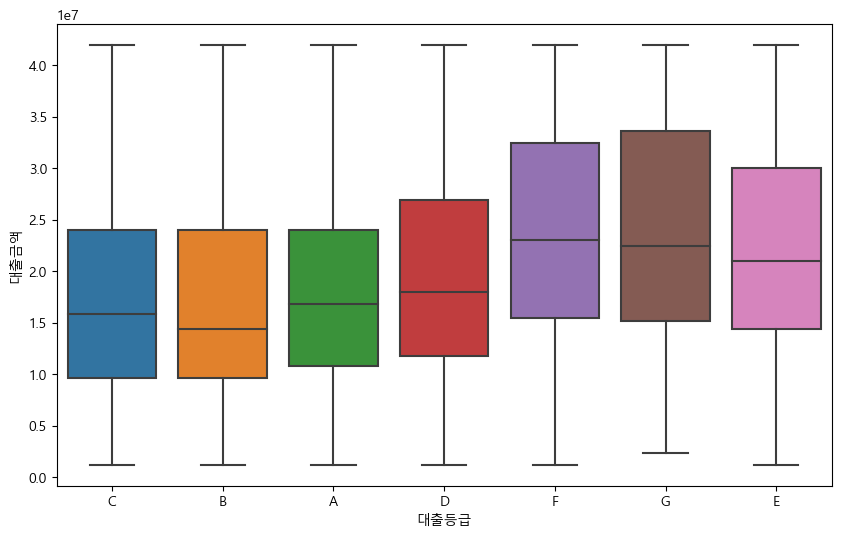

In [130]:
### 고객의 대출금액과 고객의 대출등급과의 관계 분석

sns.boxplot(data=df_train, x='대출등급', y='대출금액')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [131]:
'''

대출금액이 올라갈수록 대출등급이 떨어지거나 하는 뚜렷한 인과는 없지만

대출등급이 높은 집단들은 대부분 대출금액이 적당한 선을 유지하는 것으로 해석된다

'''



'\n\n대출금액이 올라갈수록 대출등급이 떨어지거나 하는 뚜렷한 인과는 없지만\n\n대출등급이 높은 집단들은 대부분 대출금액이 적당한 선을 유지하는 것으로 해석된다\n\n'

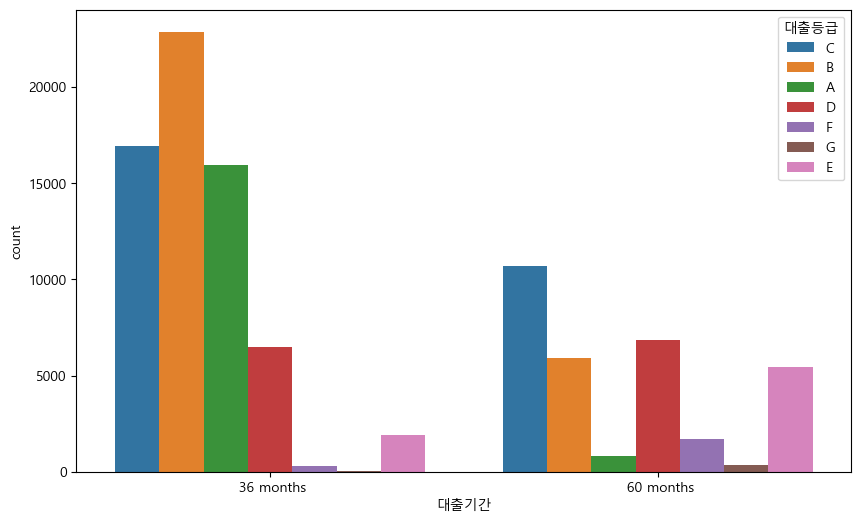

In [132]:
### 고객의 대출기간과 고객의 대출등급의 관계 분석

sns.countplot(data=df_train, x='대출기간', hue='대출등급')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [133]:
'''

36개월 대출한 집단들 중 대출등급 B인원이 제일 많고 F인원이 제일 적다.

60개월 대출한 집단들 중 대출등급 C인원이 제일 많고 G인원이 제일 적다.

이와 같은 결과로 보다 대출등급이 높은 인원일수록 대출이 많고

대출한 개월이 많을수록 대출등급이 낮은 인원들의 수는 감소가 된다.

어찌보면 당연한 사실이다.

'''

'\n\n36개월 대출한 집단들 중 대출등급 B인원이 제일 많고 F인원이 제일 적다.\n\n60개월 대출한 집단들 중 대출등급 C인원이 제일 많고 G인원이 제일 적다.\n\n이와 같은 결과로 보다 대출등급이 높은 인원일수록 대출이 많고\n\n대출한 개월이 많을수록 대출등급이 낮은 인원들의 수는 감소가 된다.\n\n어찌보면 당연한 사실이다.\n\n'

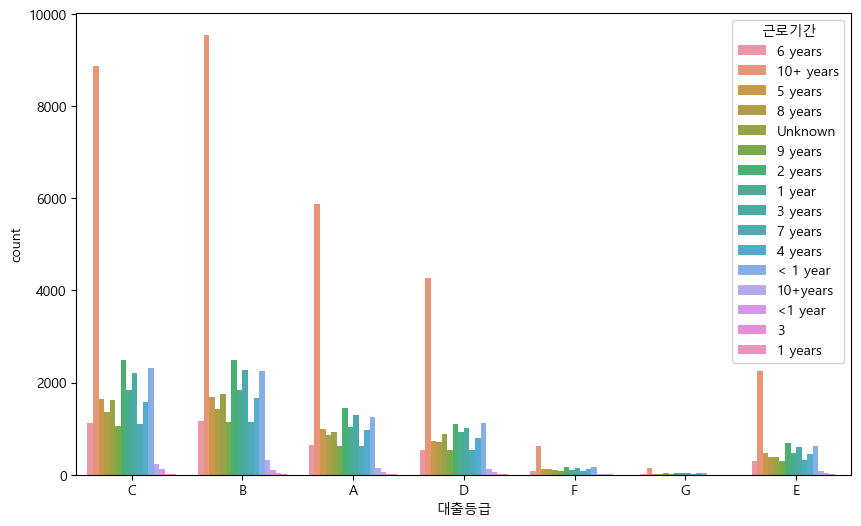

In [134]:
### 근로기간과 고객의 대출등급과의 관계 분석

sns.countplot(data=df_train, x='대출등급', hue='근로기간')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [135]:
'''

10년 이상 근로한 인원이 제일 많은 집단은 B그룹이며, C A D E F G 순서대로 이어진다.

근로한 인원이 높을수록 대출등급자체가 높은 것으로 보인다.

'''



'\n\n10년 이상 근로한 인원이 제일 많은 집단은 B그룹이며, C A D E F G 순서대로 이어진다.\n\n근로한 인원이 높을수록 대출등급자체가 높은 것으로 보인다.\n\n'

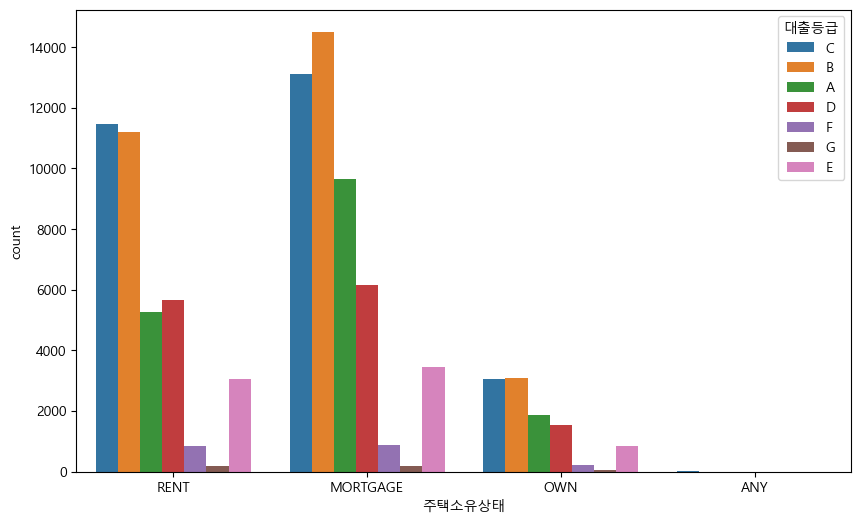

In [136]:
### 주택소유상태와 고객의 대출등급과의 관계 분석

sns.countplot(data=df_train, x='주택소유상태', hue='대출등급')
plt.rcParams['figure.figsize'] = [10,6]
plt.show()


# Pre-Processing X_test

In [137]:
file_path2 = 'D:\Code\[중]고객 대출 등급 문류 해커톤/test.csv'

df2 = pd.read_csv(file_path2)

print(df2)

               ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TEST_00000  16800000   36 months    8 years  MORTGAGE  132000000   
1      TEST_00001   8400000   36 months    5 years      RENT   89971200   
2      TEST_00002  17280000   36 months    6 years      RENT  150000000   
3      TEST_00003  14400000   36 months    5 years  MORTGAGE   66000000   
4      TEST_00004  27600000   36 months    5 years      RENT   55200000   
...           ...       ...         ...        ...       ...        ...   
64192  TEST_64192  30000000   36 months    3 years  MORTGAGE   78000000   
64193  TEST_64193  30000000   60 months  10+ years  MORTGAGE  109200000   
64194  TEST_64194   6120000   36 months  10+ years      RENT   39600000   
64195  TEST_64195  11520000   36 months  10+ years  MORTGAGE   66000000   
64196  TEST_64196   6000000   36 months    9 years      RENT  180000000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금      총상환이자  총연체금액  \
0            19.64    1

In [138]:
df2.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            64197 non-null  object 
 1   대출금액          64197 non-null  int64  
 2   대출기간          64197 non-null  object 
 3   근로기간          64197 non-null  object 
 4   주택소유상태        64197 non-null  object 
 5   연간소득          64197 non-null  int64  
 6   부채_대비_소득_비율   64197 non-null  float64
 7   총계좌수          64197 non-null  int64  
 8   대출목적          64197 non-null  object 
 9   최근_2년간_연체_횟수  64197 non-null  int64  
 10  총상환원금         64197 non-null  int64  
 11  총상환이자         64197 non-null  float64
 12  총연체금액         64197 non-null  float64
 13  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 6.9+ MB


## Outlier 

In [140]:
df2.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

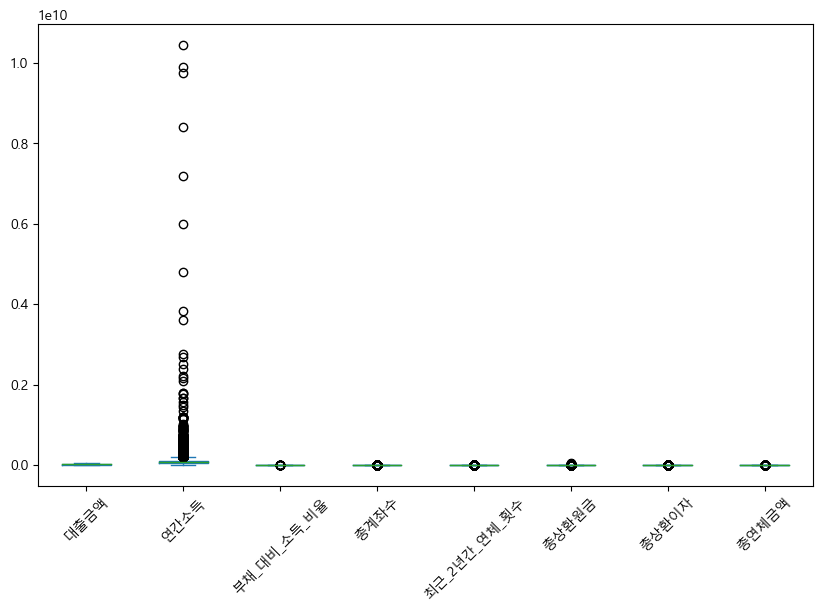

In [141]:
df2.loc[:, ['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자','총연체금액']].plot(kind='box', rot=45)
plt.show()

In [142]:
### 대출금액 컬럼의 첫번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = df2.loc[:,'대출금액'].quantile(q=0.25)

q3 = df2.loc[:,'대출금액'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'대출금액 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'대출금액 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'대출금액 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (df2.loc[:,'대출금액']<min) | (df2.loc[:,'대출금액']>max)

print('*'*80)

outlier = df2.loc[condition]
print(f'대출금액 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = df2.loc[condition].index
print(f'대출금액 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_loan = df2.loc[:,'대출금액'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_loan}')

1사분위값 : 
10080000.0
********************************************************************************
3사분위값 : 
24000000.0
********************************************************************************
대출금액 컬럼의 첫번째 iqr = 13920000.0
********************************************************************************
대출금액 컬럼의 첫번째 정상범위의 최솟값 : -10800000.0
대출금액 컬럼의 첫번째 정상범위의 최댓값 : 44880000.0
********************************************************************************
********************************************************************************
대출금액 컬럼의 첫번째 이상치 : 
Empty DataFrame
Columns: [ID, 대출금액, 대출기간, 근로기간, 주택소유상태, 연간소득, 부채_대비_소득_비율, 총계좌수, 대출목적, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수]
Index: []
********************************************************************************
대출금액 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Index([], dtype='int64')
********************************************************************************
최종 결과 : 
0        16800000
1         8400000
2        17280000
3        14400

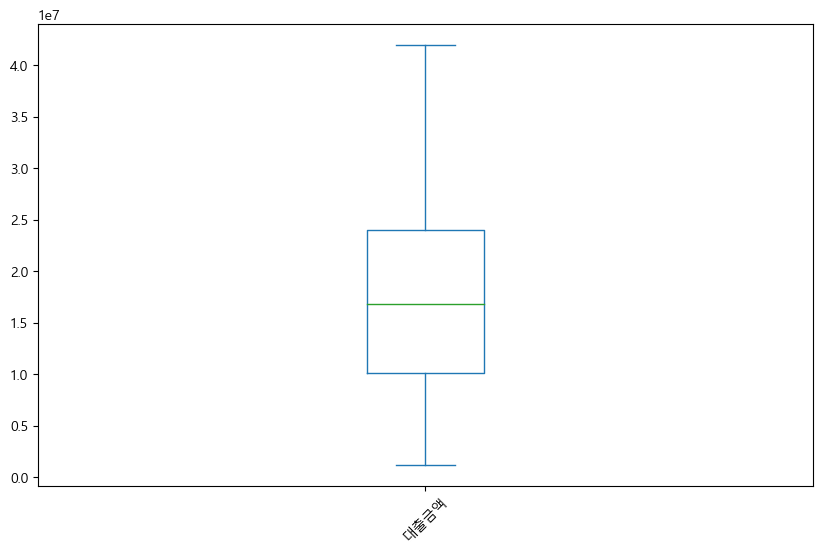

'이상치 없음 '

In [143]:
### 대출금액 컬럼의 두번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_loan.plot(kind='box', rot=45)
plt.show()

'''이상치 없음 '''


#q1 = df2.loc[:,'대출금액'].quantile(q=0.25)
#
#q3 = df2.loc[:,'대출금액'].quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#
#print('*'*80)
#
#print(f'3사분위값 : \n{q3}')
#
#print('*'*80)
#
#print(f'대출금액 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#
#min = q1 - (iqr * 1.5)
#print(f'대출금액 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#
#max = q3 + (iqr * 1.5)
#print(f'대출금액 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (df2.loc[:,'대출금액']<min) | (df2.loc[:,'대출금액']>max)
#
#print('*'*80)
#
#outlier = df2.loc[condition]
#print(f'대출금액 컬럼의 첫번째 이상치 : \n{outlier}')
#
#print('*'*80)
#
#outlier_index = df2.loc[condition].index
#print(f'대출금액 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거.
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_loan = df2.loc[:,'대출금액'].drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_loan}')

In [144]:
### 근로기간 컬럼의 첫번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = df2.loc[:,'근로기간'].quantile(q=0.25)

q3 = df2.loc[:,'근로기간'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'근로기간 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'근로기간 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'근로기간 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (df2.loc[:,'근로기간']<min) | (df2.loc[:,'근로기간']>max)

print('*'*80)

outlier = df2.loc[condition]
print(f'근로기간 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = df2.loc[condition].index
print(f'근로기간 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_work = df2.loc[:,'근로기간'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_work}')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [145]:
### 근로기간 컬럼의 두번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_work.plot(kind='box', rot=45)
plt.show()

''' 이상치 없음 '''


#
#q1 = df2.loc[:,'근로기간'].quantile(q=0.25)
#
#q3 = df2.loc[:,'근로기간'].quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#
#print('*'*80)
#
#print(f'3사분위값 : \n{q3}')
#
#print('*'*80)
#
#print(f'근로기간 컬럼의 첫번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#
#min = q1 - (iqr * 1.5)
#print(f'근로기간 컬럼의 첫번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#
#max = q3 + (iqr * 1.5)
#print(f'근로기간 컬럼의 첫번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (df2.loc[:,'근로기간']<min) | (df2.loc[:,'근로기간']>max)
#
#print('*'*80)
#
#outlier = df2.loc[condition]
#print(f'근로기간 컬럼의 첫번째 이상치 : \n{outlier}')
#
#print('*'*80)
#
#outlier_index = df2.loc[condition].index
#print(f'근로기간 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거.
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_work = df2.loc[:,'근로기간'].drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_work}')

NameError: name 'cleaned_work' is not defined

In [146]:
### 연간소득 컬럼의 첫번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

q1 = df2.loc[:,'연간소득'].quantile(q=0.25)

q3 = df2.loc[:,'연간소득'].quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'연간소득 컬럼의 첫번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'연간소득 컬럼의 첫번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'연간소득 컬럼의 첫번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (df2.loc[:,'연간소득']<min) | (df2.loc[:,'연간소득']>max)

print('*'*80)

outlier = df2.loc[condition]
print(f'연간소득 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = df2.loc[condition].index
print(f'연간소득 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year = df2.loc[:,'연간소득'].drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year}')

1사분위값 : 
57598800.0
********************************************************************************
3사분위값 : 
112800000.0
********************************************************************************
연간소득 컬럼의 첫번째 iqr = 55201200.0
********************************************************************************
연간소득 컬럼의 첫번째 정상범위의 최솟값 : -25203000.0
연간소득 컬럼의 첫번째 정상범위의 최댓값 : 195601800.0
********************************************************************************
********************************************************************************
연간소득 컬럼의 첫번째 이상치 : 
               ID      대출금액        대출기간       근로기간    주택소유상태        연간소득  \
26     TEST_00026  30000000   36 months    8 years      RENT   240000000   
33     TEST_00033  12660000   36 months  10+ years  MORTGAGE   237600000   
63     TEST_00063  30000000   60 months    4 years  MORTGAGE   432000000   
145    TEST_00145  14400000   36 months    5 years      RENT   210000000   
148    TEST_00148  30000000   36 months  10+ years

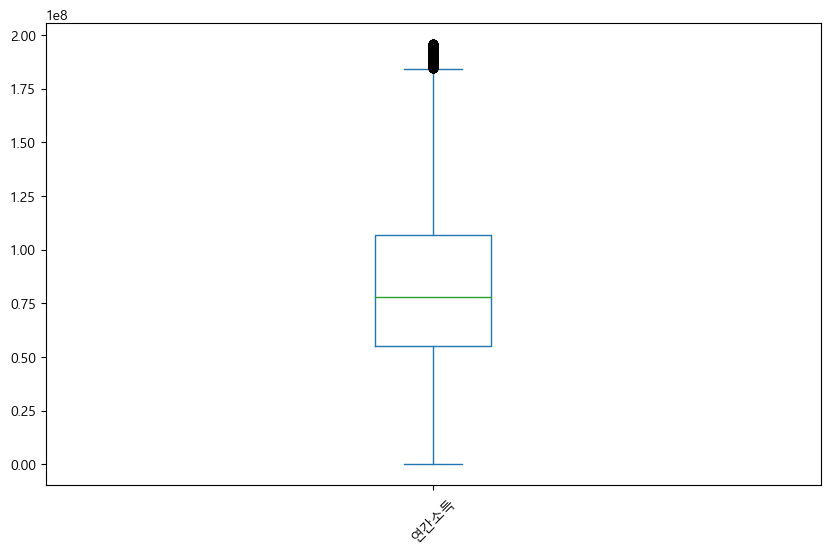

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
106825200.0
********************************************************************************
연간소득 컬럼의 두번째 iqr = 51625200.0
********************************************************************************
연간소득 컬럼의 두번째 정상범위의 최솟값 : -22237800.0
연간소득 컬럼의 두번째 정상범위의 최댓값 : 184263000.0
********************************************************************************
********************************************************************************
연간소득 컬럼의 첫번째 이상치 : 
117      195600000
158      192000000
211      184800000
430      187200000
699      192000000
           ...    
63371    187200000
63375    189600000
63409    192000000
63428    186000000
64018    187200000
Name: 연간소득, Length: 528, dtype: int64
********************************************************************************
연간소득 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Index([  117,   158,   211,   430,   699,   793,   860,  1087,  1202,  12

In [147]:
### 연간소득 컬럼의 두번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year.plot(kind='box',rot=45)
plt.show()

''' 이상치 존재 '''


q1 =cleaned_year.quantile(q=0.25)

q3 =cleaned_year.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'연간소득 컬럼의 두번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'연간소득 컬럼의 두번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'연간소득 컬럼의 두번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year<min) | (cleaned_year>max)

print('*'*80)

outlier = cleaned_year[condition]
print(f'연간소득 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = cleaned_year[condition].index
print(f'연간소득 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year2 = cleaned_year.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year2}')

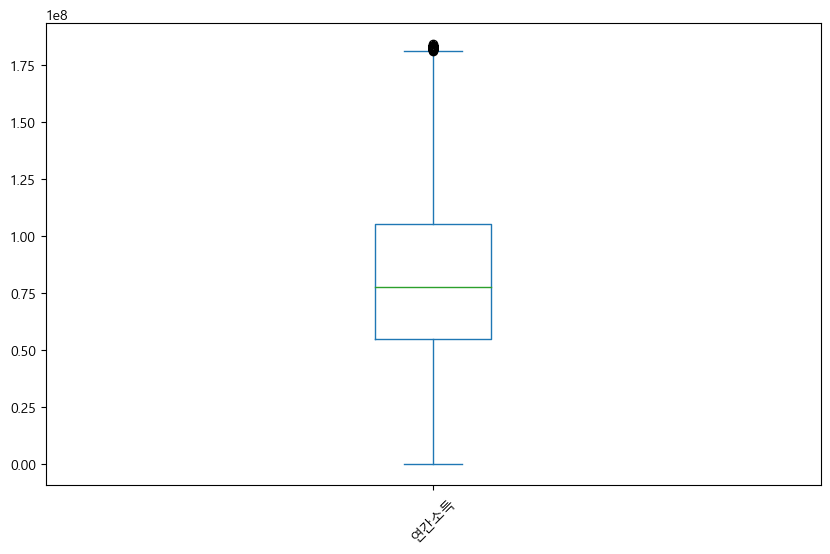

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105600000.0
********************************************************************************
연간소득 컬럼의 세번째 iqr = 50400000.0
********************************************************************************
연간소득 컬럼의 세번째 정상범위의 최솟값 : -20400000.0
연간소득 컬럼의 세번째 정상범위의 최댓값 : 181200000.0
********************************************************************************
********************************************************************************
연간소득 컬럼의 첫번째 이상치 : 
585      182400000
2125     183600000
2195     182400000
3426     182400000
3839     182400000
           ...    
57022    182400000
57340    182400000
58500    182400000
62164    182880000
63003    182400000
Name: 연간소득, Length: 68, dtype: int64
********************************************************************************
연간소득 컬럼의 첫번째 이상치 데이터의 인덱스 : 
Index([  585,  2125,  2195,  3426,  3839,  3891,  4484,  4523,  6699,  789

In [148]:
### 연간소득 컬럼의 세번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year2.plot(kind='box',rot=45)
plt.show()

''' 이상치 존재 '''


q1 =cleaned_year2.quantile(q=0.25)

q3 =cleaned_year2.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'연간소득 컬럼의 세번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'연간소득 컬럼의 세번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'연간소득 컬럼의 세번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year2<min) | (cleaned_year2>max)

print('*'*80)

outlier = cleaned_year2[condition]
print(f'연간소득 컬럼의 첫번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = cleaned_year2[condition].index
print(f'연간소득 컬럼의 첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year3 = cleaned_year2.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year3}')

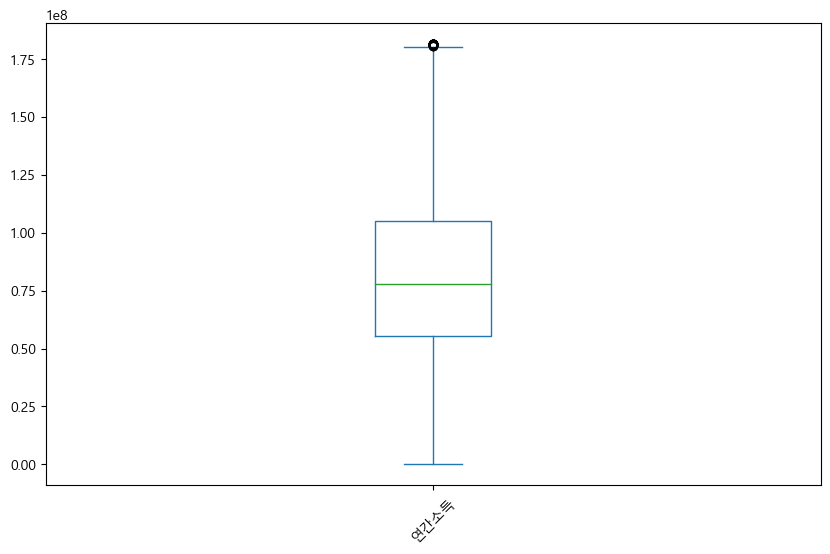

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105214200.0
********************************************************************************
연간소득 컬럼의 네번째 iqr = 50014200.0
********************************************************************************
연간소득 컬럼의 네번째 정상범위의 최솟값 : -19821300.0
연간소득 컬럼의 네번째 정상범위의 최댓값 : 180235500.0
********************************************************************************
********************************************************************************
연간소득 컬럼의 네번째 이상치 : 
4767     180960000
5112     181200000
10521    181080000
10849    181200000
12346    181200000
17202    181200000
19899    181200000
24960    180960000
27292    181200000
33730    181200000
34118    181200000
36782    181200000
40169    181200000
40354    181200000
42472    181200000
42970    181200000
43182    181200000
43233    181200000
44334    180960000
46861    181200000
49491    180480000
53313    180576000
56840    181

In [149]:
### 연간소득 컬럼의 네번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year3.plot(kind='box',rot=45)
plt.show()

''' 이상치 존재 '''


q1 =cleaned_year3.quantile(q=0.25)

q3 =cleaned_year3.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'연간소득 컬럼의 네번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'연간소득 컬럼의 네번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'연간소득 컬럼의 네번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year3<min) | (cleaned_year3>max)

print('*'*80)

outlier = cleaned_year3[condition]
print(f'연간소득 컬럼의 네번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = cleaned_year3[condition].index
print(f'연간소득 컬럼의 네번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year4 = cleaned_year3.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year4}')

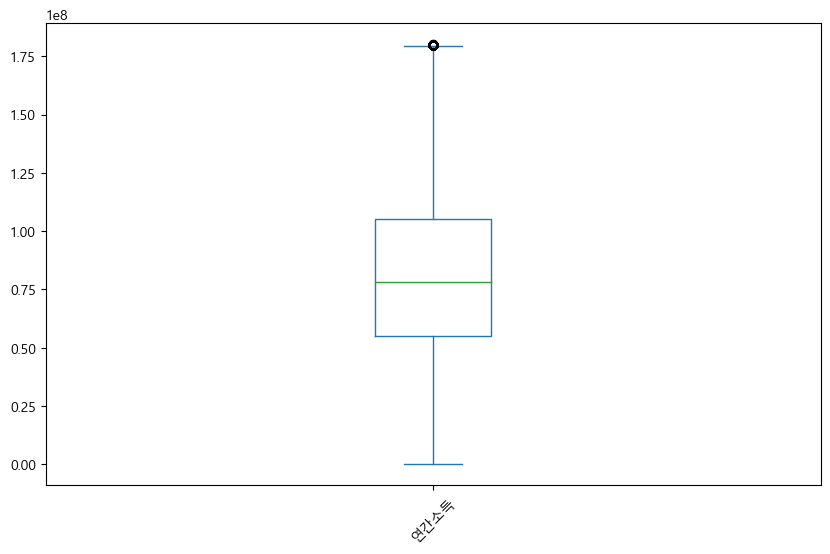

1사분위값 : 
55200000.0
********************************************************************************
3사분위값 : 
105000000.0
********************************************************************************
연간소득 컬럼의 다섯번째 iqr = 49800000.0
********************************************************************************
연간소득 컬럼의 다섯번째 정상범위의 최솟값 : -19500000.0
연간소득 컬럼의 다섯번째 정상범위의 최댓값 : 179700000.0
********************************************************************************
********************************************************************************
연간소득 컬럼의 다섯번째 이상치 : 
5        180000000
34       180000000
62       180000000
377      180000000
384      180000000
           ...    
63741    180000000
64011    180000000
64082    180000000
64171    180000000
64196    180000000
Name: 연간소득, Length: 681, dtype: int64
********************************************************************************
연간소득 컬럼의 다섯번째 이상치 데이터의 인덱스 : 
Index([    5,    34,    62,   377,   384,   649,   815,   848,  1065

In [152]:
### 연간소득 컬럼의 다섯번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year4.plot(kind='box',rot=45)
plt.show()

''' 이상치 존재 '''


q1 =cleaned_year4.quantile(q=0.25)

q3 =cleaned_year4.quantile(q=0.75)

iqr = q3 - q1

print(f'1사분위값 : \n{q1}')

print('*'*80)

print(f'3사분위값 : \n{q3}')

print('*'*80)

print(f'연간소득 컬럼의 다섯번째 iqr = {iqr}')

print('*'*80)

# 정상 범위의 최솟값

min = q1 - (iqr * 1.5)
print(f'연간소득 컬럼의 다섯번째 정상범위의 최솟값 : {min}')

# 정상 범위의 최댓값

max = q3 + (iqr * 1.5)
print(f'연간소득 컬럼의 다섯번째 정상범위의 최댓값 : {max}')

print('*'*80)

condition = (cleaned_year4<min) | (cleaned_year4>max)

print('*'*80)

outlier = cleaned_year4[condition]
print(f'연간소득 컬럼의 다섯번째 이상치 : \n{outlier}')

print('*'*80)

outlier_index = cleaned_year4[condition].index
print(f'연간소득 컬럼의 다섯번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('*'*80)

# 이후에 drop()으로 이상치 제거.
# df.col.drop(index=[이상치 행의 인덱스])
cleaned_year5 = cleaned_year4.drop(index=outlier_index)
print(f'최종 결과 : \n{cleaned_year5}')

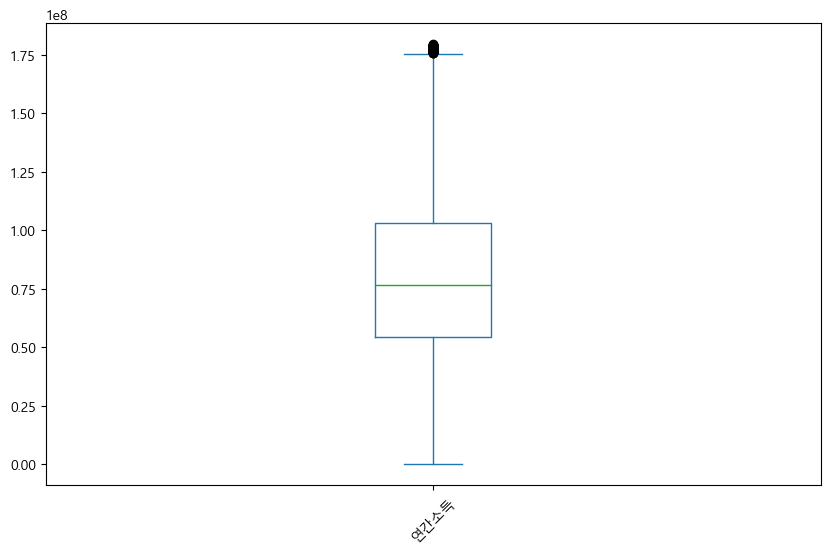

' 이상치 존재 '

In [153]:
### 연간소득 컬럼의 여섯번째 이상치 판단

'''
1. IQR = Q3- Q1
2. 정상 범위의 취소 : Q1 - (IQR*1.5)
3. 정상 범위의 최대 : Q3 + (IQR*1.5)
'''

cleaned_year5.plot(kind='box',rot=45)
plt.show()

''' 이상치 존재 '''
#
#
#q1 =cleaned_year4.quantile(q=0.25)
#
#q3 =cleaned_year4.quantile(q=0.75)
#
#iqr = q3 - q1
#
#print(f'1사분위값 : \n{q1}')
#
#print('*'*80)
#
#print(f'3사분위값 : \n{q3}')
#
#print('*'*80)
#
#print(f'연간소득 컬럼의 다섯번째 iqr = {iqr}')
#
#print('*'*80)
#
## 정상 범위의 최솟값
#
#min = q1 - (iqr * 1.5)
#print(f'연간소득 컬럼의 다섯번째 정상범위의 최솟값 : {min}')
#
## 정상 범위의 최댓값
#
#max = q3 + (iqr * 1.5)
#print(f'연간소득 컬럼의 다섯번째 정상범위의 최댓값 : {max}')
#
#print('*'*80)
#
#condition = (cleaned_year4<min) | (cleaned_year4>max)
#
#print('*'*80)
#
#outlier = cleaned_year4[condition]
#print(f'연간소득 컬럼의 다섯번째 이상치 : \n{outlier}')
#
#print('*'*80)
#
#outlier_index = cleaned_year4[condition].index
#print(f'연간소득 컬럼의 다섯번째 이상치 데이터의 인덱스 : \n{outlier_index}')
#
#print('*'*80)
#
## 이후에 drop()으로 이상치 제거.
## df.col.drop(index=[이상치 행의 인덱스])
#cleaned_year5 = cleaned_year4.drop(index=outlier_index)
#print(f'최종 결과 : \n{cleaned_year5}')

## Label Encoding

In [151]:
df2.loc[:,'대출기간'].value_counts()

print('*'*80)


pattern = '[^0-9]'

df2.loc[:,'대출기간'] = df2.loc[:,'대출기간'].apply(lambda x:re.sub(pattern, '', x))

print(df2.loc[:,'대출기간'])

********************************************************************************
0        36
1        36
2        36
3        36
4        36
         ..
64192    36
64193    60
64194    36
64195    36
64196    36
Name: 대출기간, Length: 64197, dtype: object


In [ ]:
df2.loc[:,'근로기간'].value_counts()

print('*'*80)

df2 = df2.replace({'10+ years' : 1,
                   '2 years' : 2,
                   '< 1 year' : 3,
                   '3 years' : 4,
                   '1 year' : 5,
                   '5 years' : 6,
                   'Unknown' : 7,
                   '4 years' : 8,
                   '8 years' : 9,
                   '9 years' : 10,
                   '7 years' : 11,
                   '6 years' : 12,
                   '10+years' : 13,
                   '<1 year' : 14,
                   '3' : 15,
                   '1 years' : 16
})

print(df2)

df2.loc[:,'근로기간'].value_counts()

In [ ]:
kind6 = np.unique(

### Modeling

In [ ]:
from sklearn.model_selection import train_test_split


print('*'*80)



X_data = df_concat.drop(columns=['대출등급','ID'])

y_data = df_concat.loc[:,'대출등급']
print(y_data) # 정답컬럼.

# y_data를 숫자로 변환
print(y_data.value_counts())

y_data_numeric = y_data.map({'B':1,
                             'C':2,
                             'A':3,
                             'D':4,
                             'E':5,
                             'F':6,
                             'G':5})

print(y_data_numeric)


print(f'X_data 확인 : \n{X_data}')
print(f'y_data 확인 : \n{y_data}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y_data)

In [ ]:
# 학습용 데이터 확인

print(f'X_train의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'X_train의 index 확인 : \n{X_train.index}')

print('*'*80)

print(f'y_train의 모양 : \n{y_train.shape}')

print('*'*80)

print(f'y_train의 index 확인 : \n{y_train.index}')

print('*'*80)

print(f'y_train의 정답 분포 : \n{y_train.value_counts()}')

print('*'*80)

## GridSearchCV를 이용한 모델 최적화(RF)

### Model Generation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

base_rf = RandomForestClassifier(random_state=0)

params = {'n_estimators' : [100, 200, 300],
        'max_depth' : [5, 6, 7, 8, 9]}

grid_rf = GridSearchCV(
    estimator=base_rf,
    param_grid=params,
    scoring='accuracy',
    cv=10
)

grid_rf.fit(X_train, y_train)



In [ ]:
print(grid_rf.best_params_)

In [ ]:
best_rf = RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0)

### Model Learning

In [ ]:
best_rf.fit(X_train, y_train)

In [ ]:
pred_train = best_rf.predict(X_train)
pred_test = best_rf.predict(X_test)

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# 모델 평가

accuracy_train = accuracy_score(y_train, pred_train)

accuracy_test = accuracy_score(y_test, pred_test)

print(f'학습용 데이터에 대한 정확도 : \n{accuracy_train}')
print(f'평가용 데이터에 대한 정확도 : \n{accuracy_test}')

### 제출양식에 예측결과 입력

In [ ]:
file_path = 'D:\Code\[중]고객 대출 등급 문류 해커톤/sample_submission.csv'

sample_submission = pd.read_csv(file_path)

print(sample_submission)



In [ ]:
file_path2 = 'D:\Code\[중]고객 대출 등급 문류 해커톤/test.csv'

test3 = pd.read_csv(file_path2)

print(test3)

## 최적화 없이 RandomForest Classification

### Model Generation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0) 

### Model Learning

In [ ]:
rf.fit(X_train, y_train)

### Model Predict

In [ ]:
pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, pred_train)

accuracy_test = accuracy_score(y_test, pred_test)

print(f'학습용 데이터에 대한 정확도 : {accuracy_train}')
print('*'*80)
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}')